# MD004 ENTREGA7 ENTROPÍA


Se dispone del siguiente dataset que contiene características de dos tipos de calabazas. El objetivo será elaborar un modelo de regresión logística que nos permita realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)

- Area: área de la calabaza
- Perimeter: perímetro de la calabaza
- Major_Axis_Length: Longitud del eje más largo de la calabaza
- Minor_Axis_Length: Longitud del eje más corto de la calabaza
- Convex_Area: Área convexa de la calabaza
- Equiv_Diameter: Diámetro equivalente
- Eccentricity: Excentricidad de la calabaza
- Solidity: Solidez de la calabaza
- Extent: Alcance de la calabaza
- Roundness: Redondez de la calabaza
- Aspect_Ration: Relación de aspecto de la calabaza
- Compactness: Compactibilidad de la calabaza
- Class: Clase de la calabaza


###### Data:
20240123_Semillas_calabaza.csv'

###### Se pide:

1. Visualización, limpieza y comprensión del dataset (1p): realizar un estudio previo al tratamiento de los datos para comprender mejor la información de la que se dispone
2. Elección de variables:
- Análisis de la información mutua (2p)
- Estudio de la correlación entre las variables (1p)
- Estudio de las componentes principales: no olvidéis las visualizaciones en este apartado (2p)
3. Desarrollo de un modelo de Regresión logística (3p): justificad la elección de variables finales y valoración del modelo en función de la matriz de confusión

Nota: realizad un cambio en la variable clase para establecer como 0 el tipo de calabaza Urgup_Sivrisi y como 1 para el tipo Cercevelik
;) Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br>
<div>
<img src="attachment:image-6.png" width="500"/>
</div>



## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **FSelectorRcpp:** implementación 'Rcpp' (Weka) de los algoritmos de selección de características basados ​​en entropía 'FSelector' con soporte de matriz dispersa
- **caret:** Nos ayudará a la hora de evaluar un modelo de aprendizaje automático, sobretodo en el proceso de ajuste de hiperparámetros cuando busquemos optimizarlo. Además, contiene funciones para realizar validación cruzada
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área

In [65]:
install.packages('FSelectorRcpp')
install.packages('GGally')
install.packages('gridExtra')
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [66]:
install.packages('caret')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [67]:
library(tidyverse)
library(FSelectorRcpp)
library(ggplot2)
library(GGally)
library(gridExtra)
library(corrplot)
library(caret)


# 1. CARGA DE DATOS

In [68]:
data = read.csv(file='20240123_Semillas_calabaza.csv', header=TRUE, sep=',', dec='.')

In [69]:
head(data)
tail(data)

,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
2,2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
3,3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
4,4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
5,5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
6,6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik


,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2495,2495,79755,1146.431,470.3888,217.8296,80649,318.6647,0.8863,0.9889,0.7175,0.7626,2.1594,0.6774,Ürgüp Sivrisi
2496,2496,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2497,2497,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2498,2498,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2499,2499,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
2500,2500,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


# 2. Visualización, limpieza y comprensión del dataset

In [70]:
str(data)

'data.frame':	2500 obs. of  14 variables:
 $ X                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Area             : int  56276 76631 71623 66458 66107 73191 73338 69692 95727 73465 ...
 $ Perimeter        : num  888 1068 1083 992 998 ...
 $ Major_Axis_Length: num  326 417 436 382 384 ...
 $ Minor_Axis_Length: num  220 234 211 223 220 ...
 $ Convex_Area      : int  56831 77280 72663 67118 67117 73969 73859 70442 96831 74089 ...
 $ Equiv_Diameter   : num  268 312 302 291 290 ...
 $ Eccentricity     : num  0.738 0.828 0.875 0.812 0.819 ...
 $ Solidity         : num  0.99 0.992 0.986 0.99 0.985 ...
 $ Extent           : num  0.745 0.715 0.74 0.74 0.675 ...
 $ Roundness        : num  0.896 0.844 0.767 0.849 0.834 ...
 $ Aspect_Ration    : num  1.48 1.78 2.07 1.71 1.74 ...
 $ Compactness      : num  0.821 0.749 0.693 0.762 0.756 ...
 $ Class            : chr  "Çerçevelik" "Çerçevelik" "Çerçevelik" "Çerçevelik" ...


En un primer análisis observamos que tenemos prácticamente todas las variables numéricas, excepto la variable objetivo que es un carácter. Por otro lado, también vemos que tenemos 2500 observaciones.

In [71]:
# Eliminamos la primera columna que solo es un indice
data$X <- NULL


Eliminamos la variable X porque no nos da ninguna información, más que nada es un índice de cada observación y no parece que vaya a aportar nada a nuestro análisis.

In [72]:
# Valores nulos
sum(is.na(data))

[1] 0

In [73]:
#Estadísticos principales de nuestras variables
data_num = data %>%
  select_if(is.numeric)

cat('Análisis descriptivo de las variables numéricas:')
summary(data_num)

Análisis descriptivo de las variables numéricas:

      Area          Perimeter      Major_Axis_Length Minor_Axis_Length
 Min.   : 47939   Min.   : 868.5   Min.   :320.8     Min.   :152.2    
 1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0     1st Qu.:211.2    
 Median : 79076   Median :1123.7   Median :449.5     Median :224.7    
 Mean   : 80658   Mean   :1130.3   Mean   :456.6     Mean   :225.8    
 3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7     3rd Qu.:240.7    
 Max.   :136574   Max.   :1559.5   Max.   :661.9     Max.   :305.8    
  Convex_Area     Equiv_Diameter   Eccentricity       Solidity     
 Min.   : 48366   Min.   :247.1   Min.   :0.4921   Min.   :0.9186  
 1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317   1st Qu.:0.9883  
 Median : 79872   Median :317.3   Median :0.8637   Median :0.9903  
 Mean   : 81508   Mean   :319.3   Mean   :0.8609   Mean   :0.9895  
 3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970   3rd Qu.:0.9915  
 Max.   :138384   Max.   :417.0   Max.   :0.9481   Max.   :0.9944  
     Extent         Roundne

In [74]:
cat('Proporción de datos de cada clase:')
prop.table(table(data$Class))


Proporción de datos de cada clase:


   Çerçevelik Ürgüp Sivrisi 
         0.52          0.48 

Con este comando podemos observar que tenemos los datos prácticamente balanceados al 100% así que no hará falta usar ningún método de balanceo.

In [75]:
# Modificación de la variable categórica
data <- data %>%
  mutate(Class = as.integer(ifelse(Class == "Çerçevelik", 1, ifelse(Class == "Ürgüp Sivrisi", 0, Class))))

head(data)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,1
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,1
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,1
4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,1
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,1
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,1


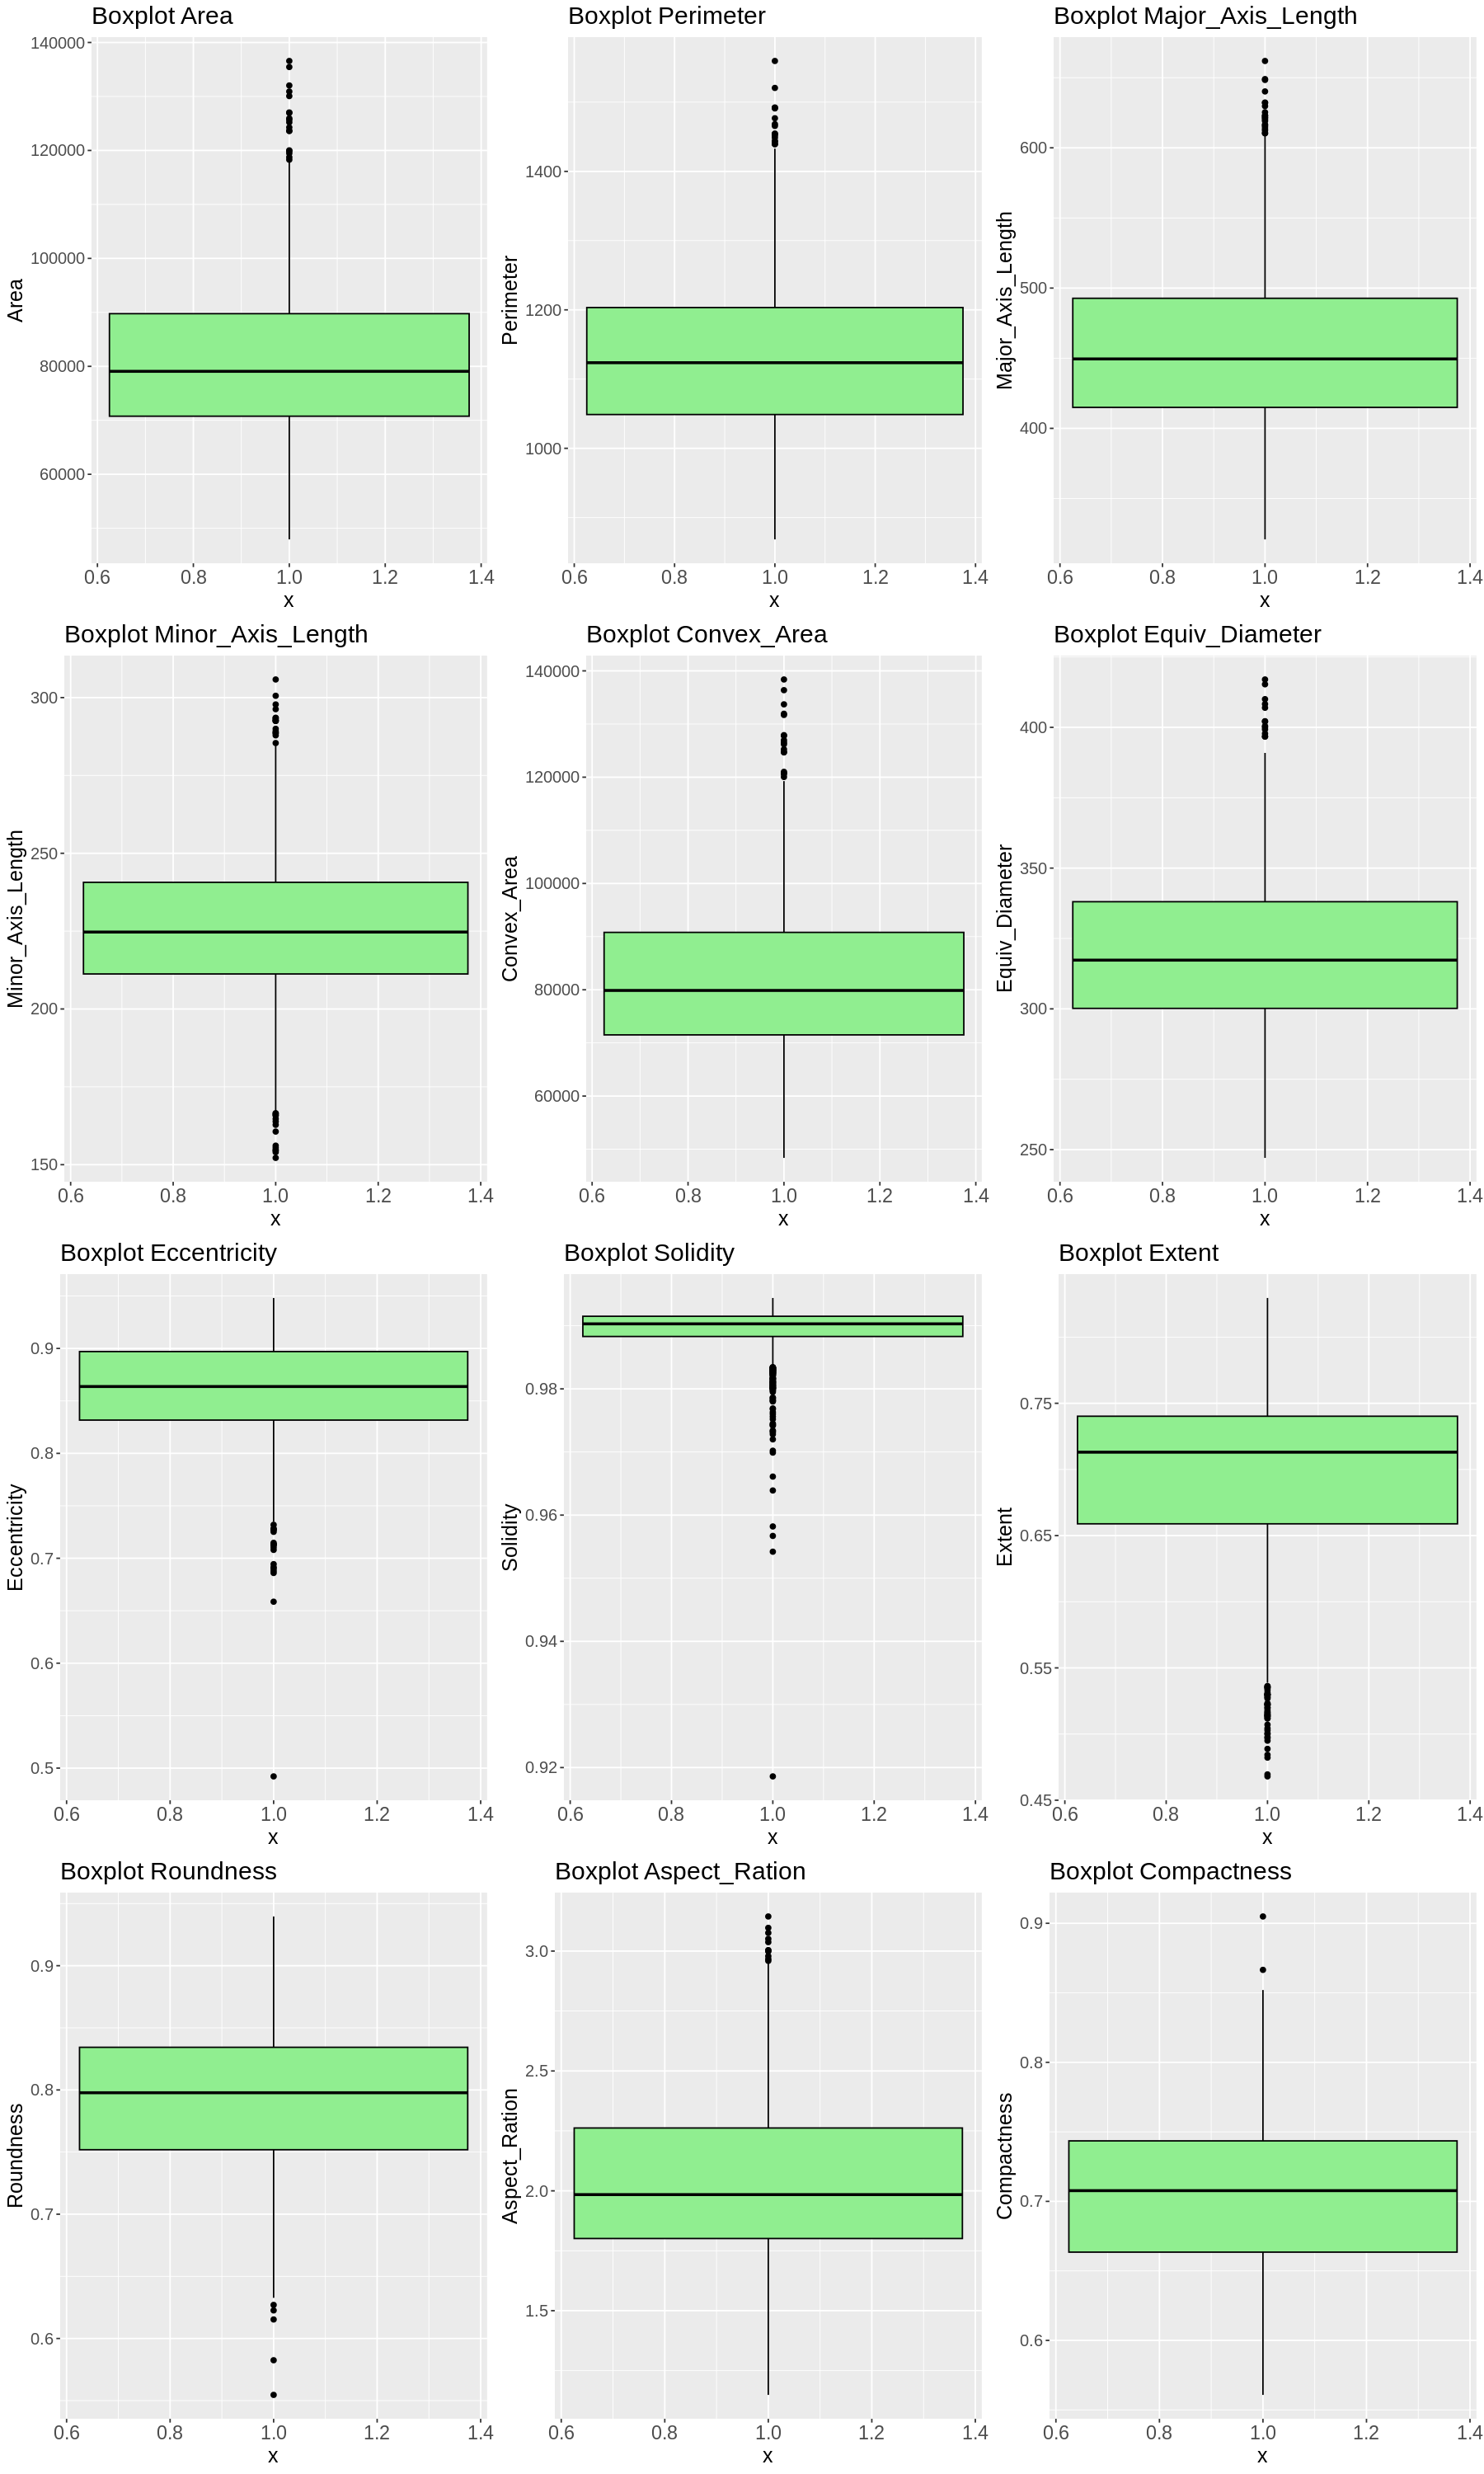

In [76]:
# Lista para almacenar los boxplots
graficos_boxplot <- list()

# Variables numéricas
var_data <- colnames(data_num)

for (variable in var_data) {
  # Crear el boxplot
  boxplot <- ggplot(data_num) +
    aes_string(x = '1', y = variable) +  # '1' como x para colocar todos los boxplots en el mismo eje x
    geom_boxplot(fill = 'lightgreen', color = 'black') +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) +
    labs(title = paste('Boxplot', variable))

  # Agregar el boxplot a la lista
  graficos_boxplot[[length(graficos_boxplot) + 1]] = boxplot
}

# Configuración de la presentación
options(
  repr.plot.width = 15,
  repr.plot.height = 25
)

# Mostrar los boxplots en un grid
grid.arrange(grobs = graficos_boxplot, ncol = 3, widths = rep(2, 3))


Con estos gráficos, se pueden observar las distribuciones que tienen todas las variables, vemos que las hay más o menos sesgadas y sobre todo podemos observar que hay outliers en prácticamente todas.

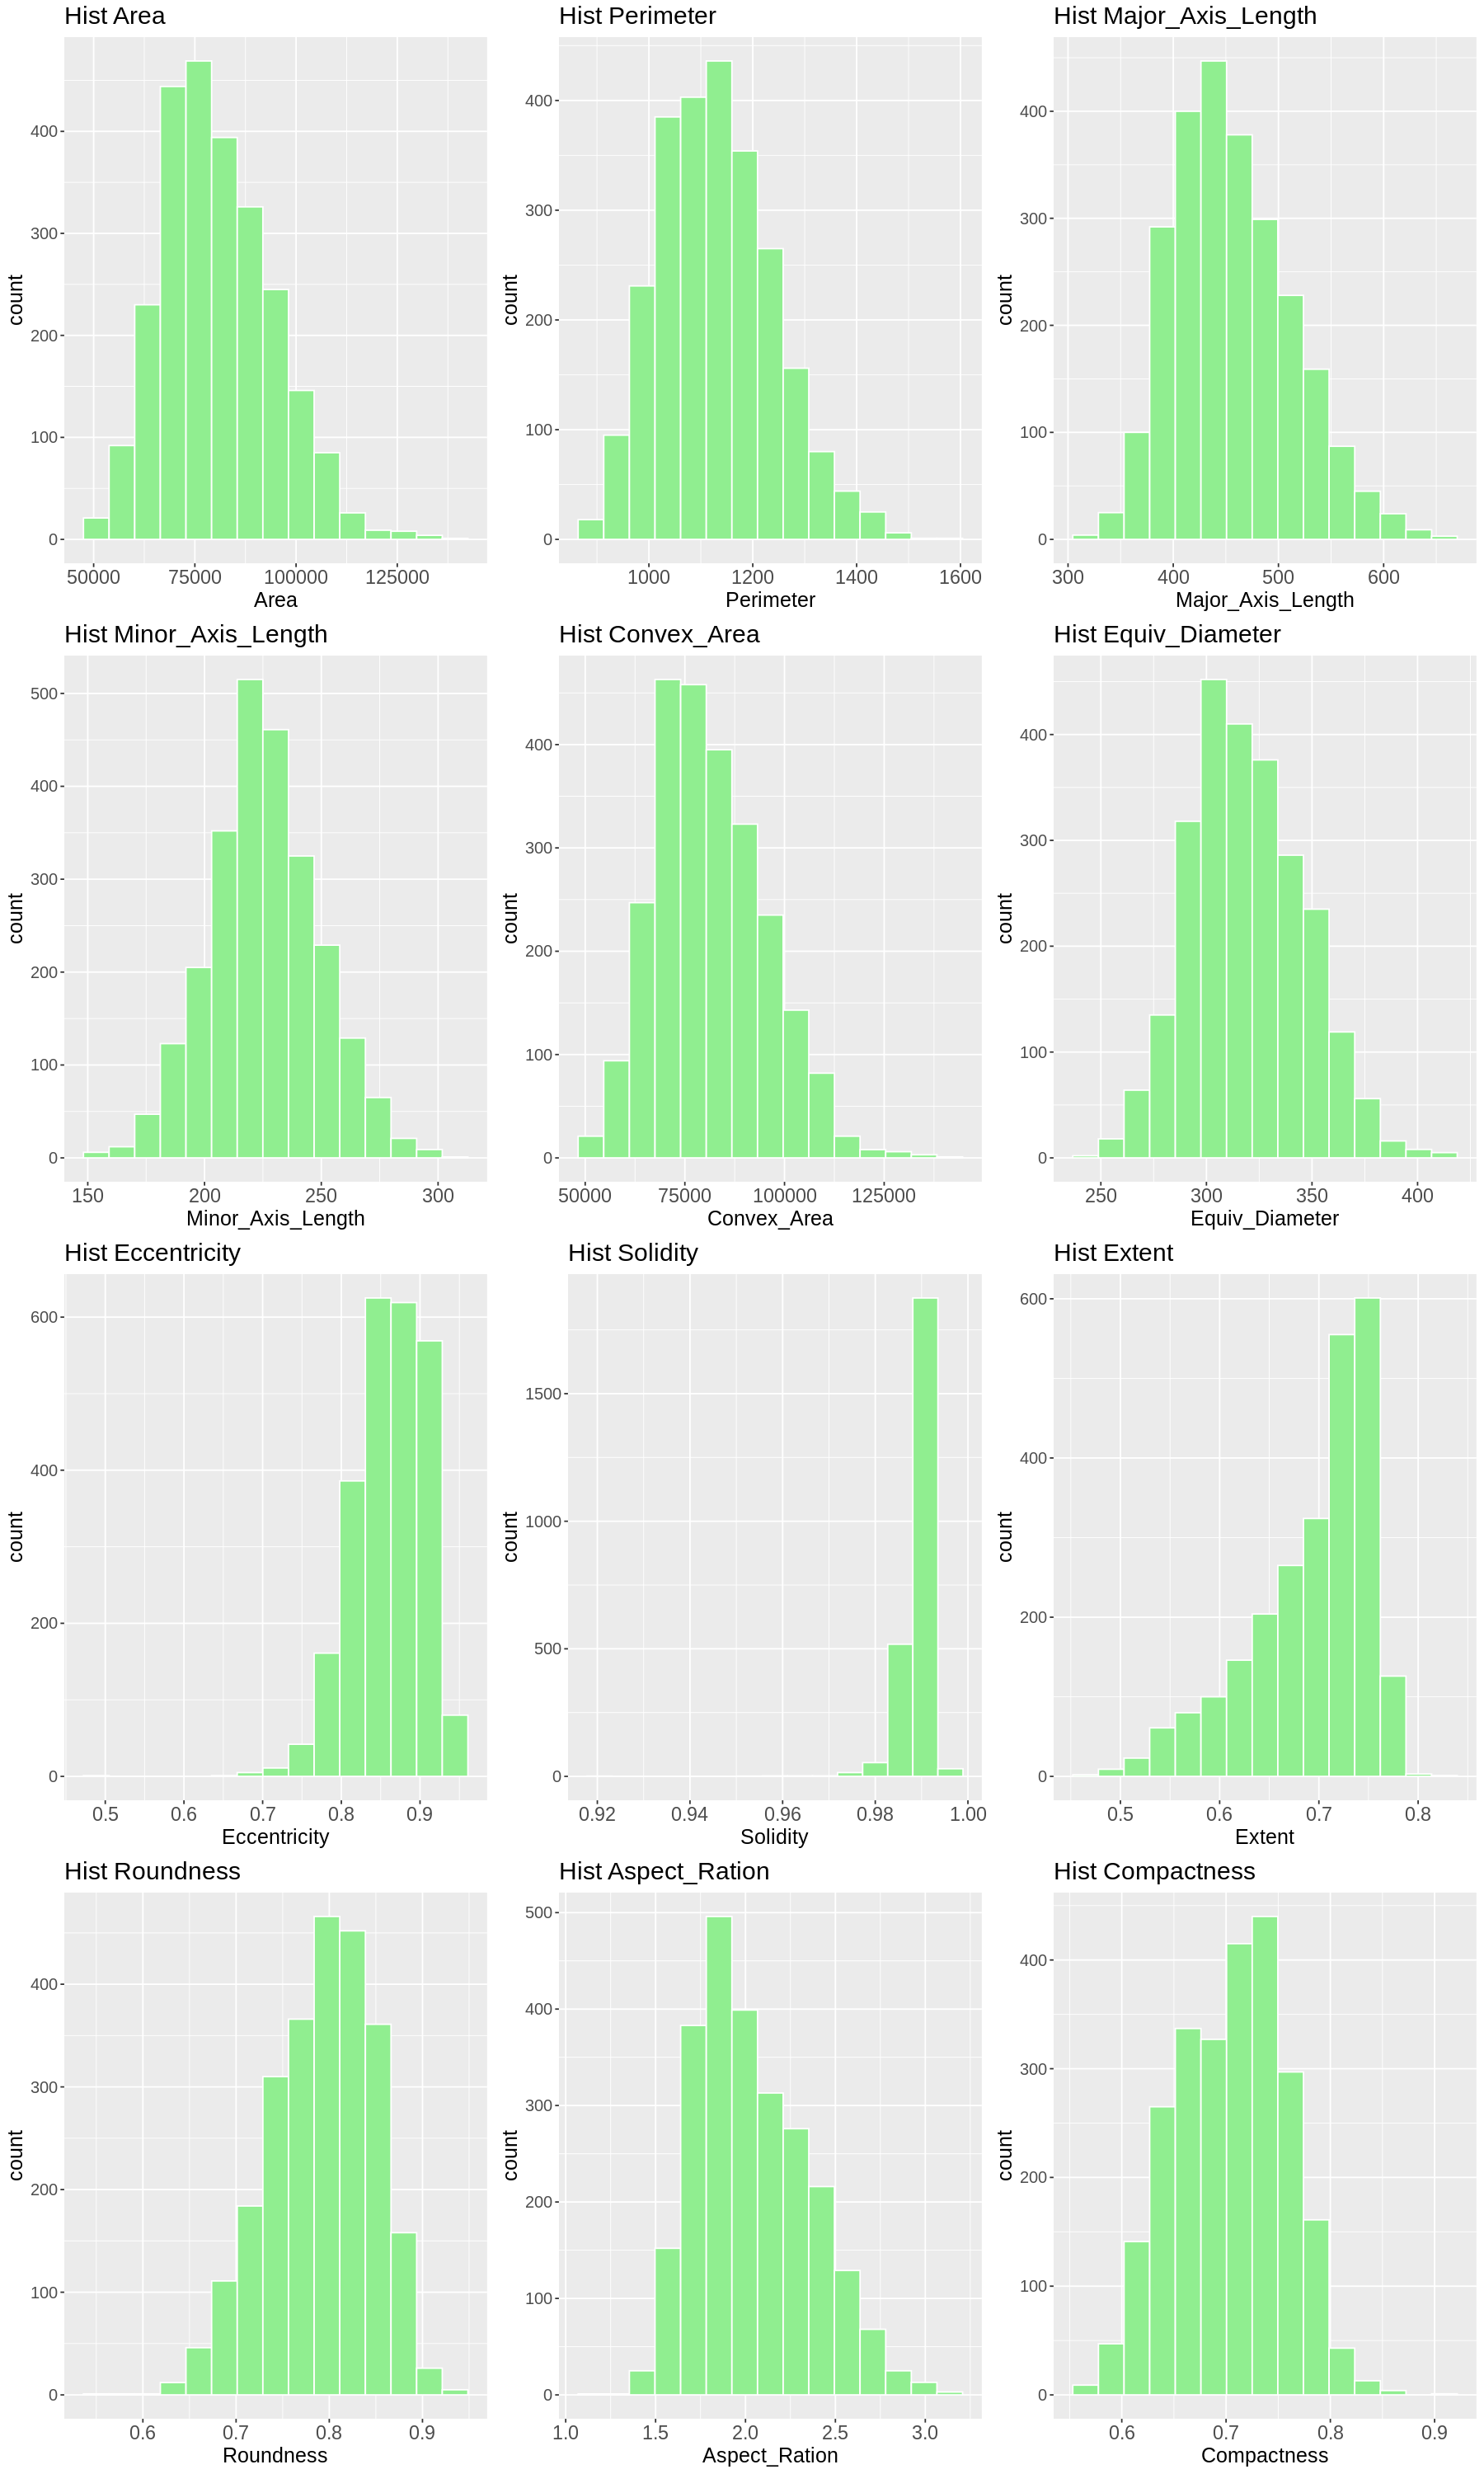

In [77]:
graficos_hist = list()
var_data = colnames(data_num)

for (variable in var_data) {

  grafico = ggplot(data_num) +
    aes_string(x = variable) +
    geom_histogram(bins = 15, fill = 'lightgreen', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) +
    labs(title = paste('Hist', variable))


  graficos_hist[[length(graficos_hist) + 1]] = grafico
}

options(
  repr.plot.width = 15,
  repr.plot.height = 25
)

# Mostrar los histogramas en un grid
grid.arrange(grobs = graficos_hist, ncol = 3, widths = rep(2, 3))

Con este segundo gráfico de las distribuciones de nuestras variables, podemos ver que hay algunas que podrían acercarse un poco a una normal a simple vista. Habría que investigar con más detalle, pero las variables Equiv_Diameter, Major y Minor axis length parecen cercanas a la normal. Por otro lado, tenemos diversas variables muy sesgadas a la derecha, tanto la Eccentricity, como Solidity y Extent.

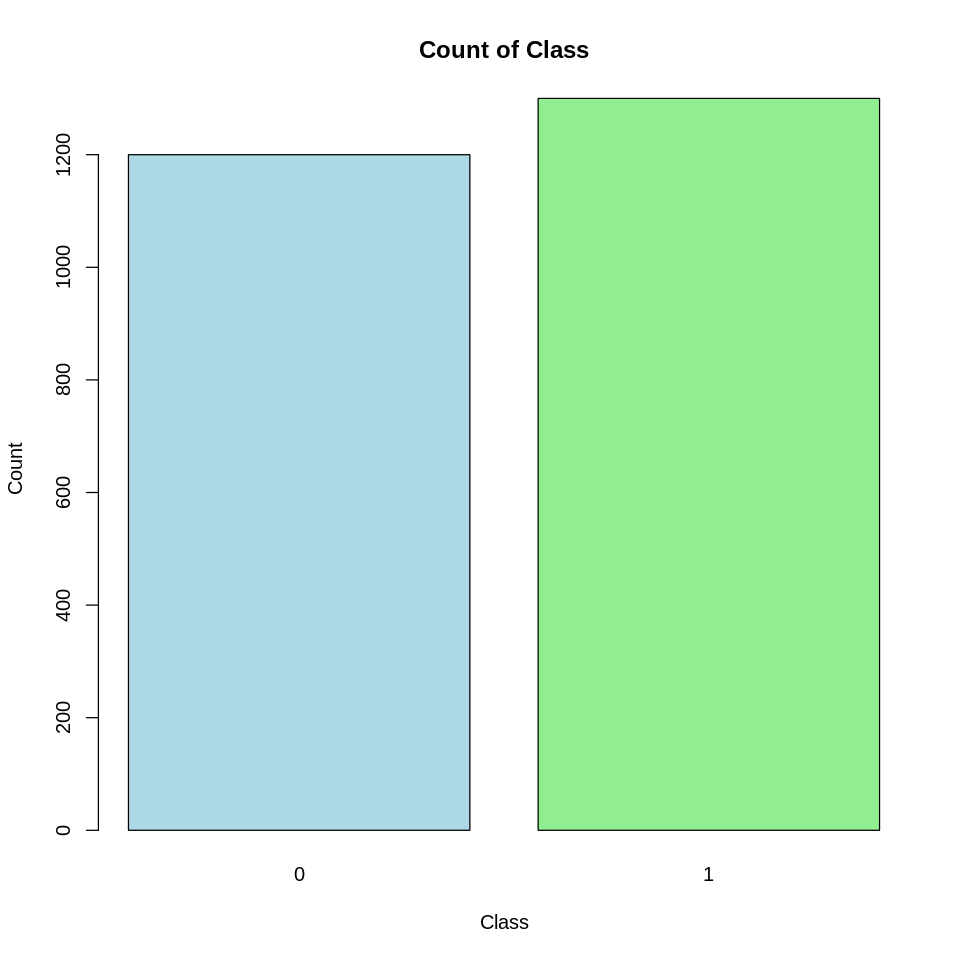

In [78]:
# Graficamos la variable catégorica balanceada
options(
  repr.plot.width = 8,
  repr.plot.height = 8
)

barplot(table(data$Class),
        main = 'Count of Class',
        names.arg = c(0,1),
        col = c('lightblue','lightgreen'),
        ylab = 'Count',
        xlab = 'Class')

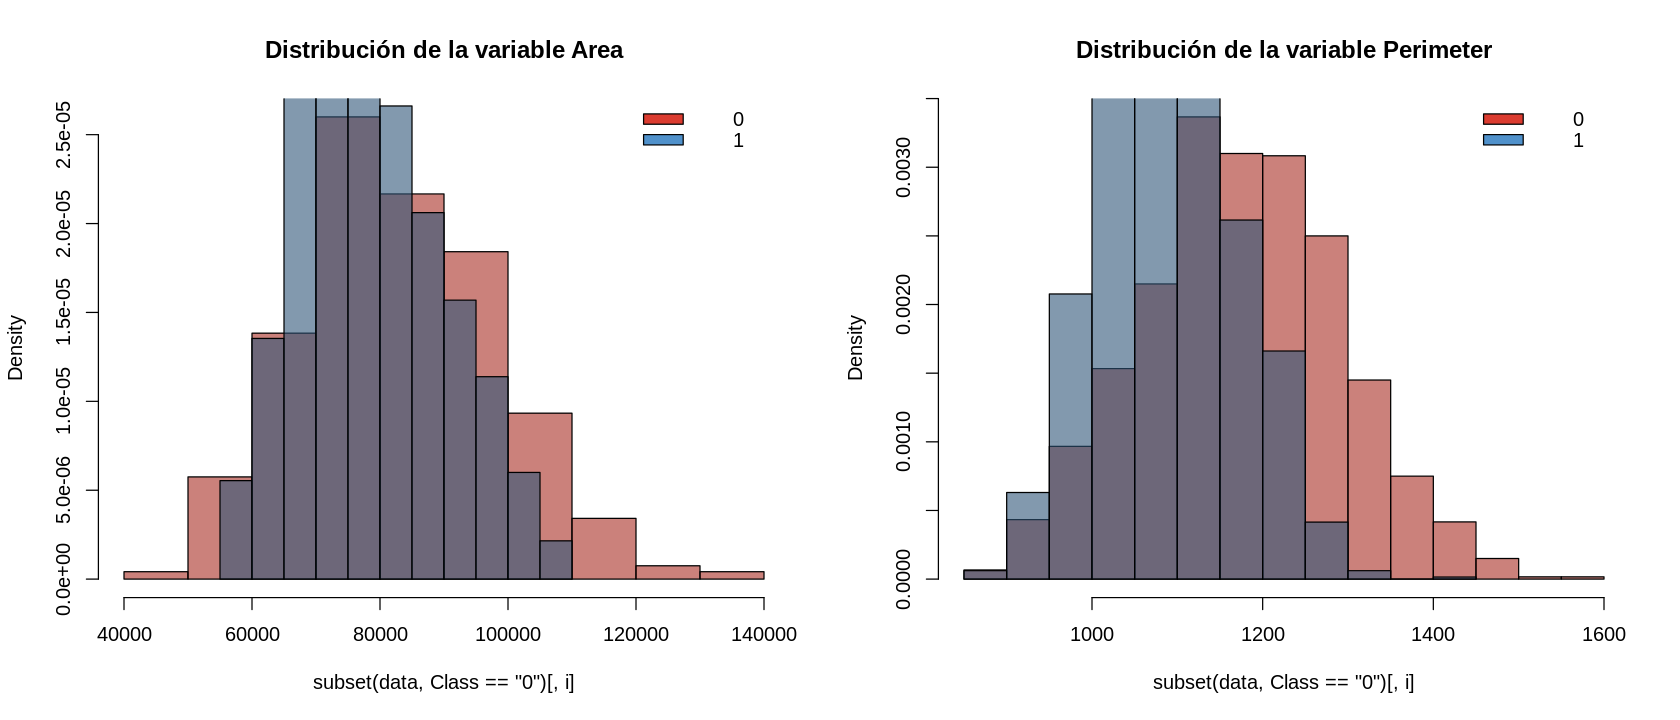

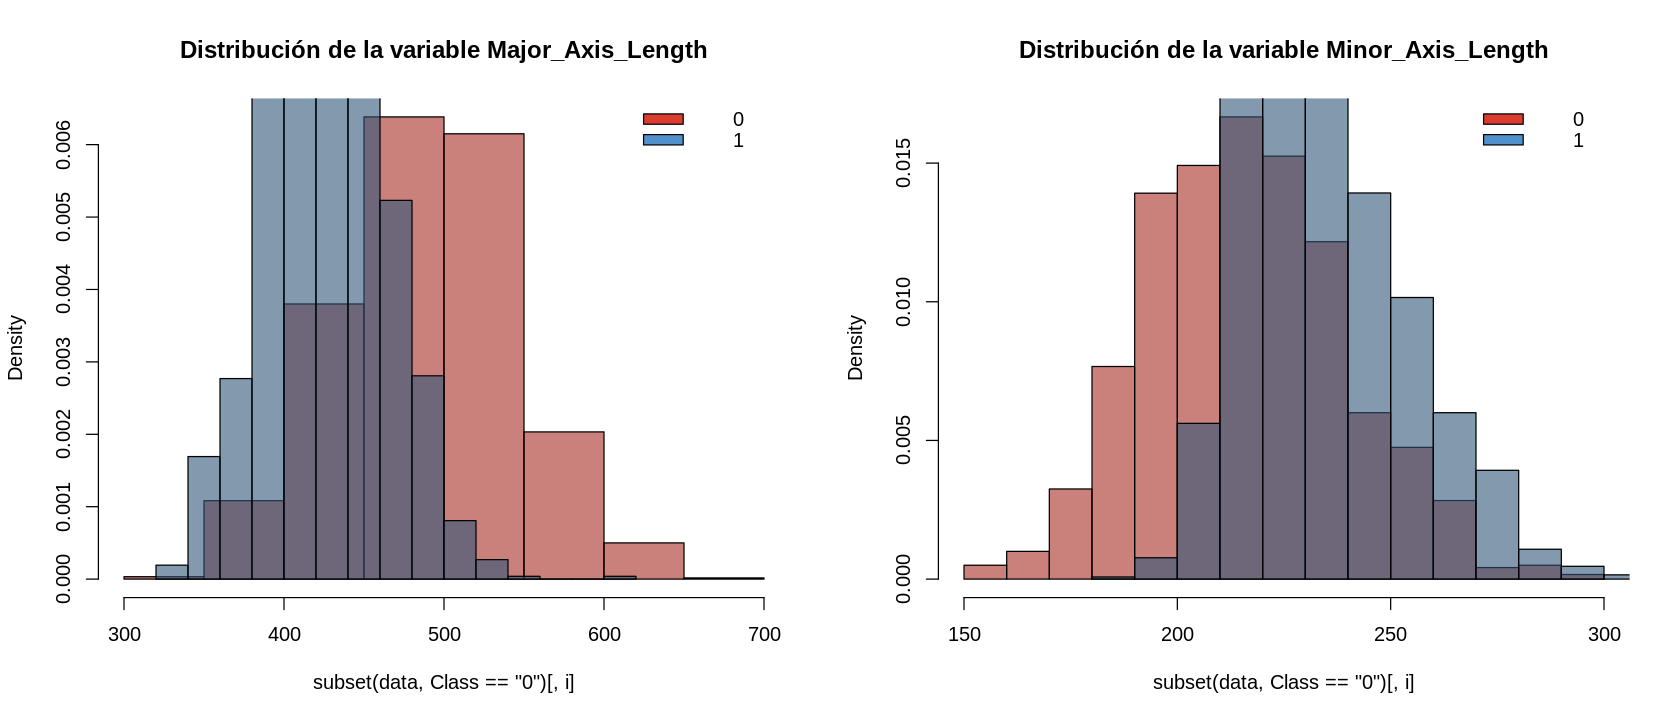

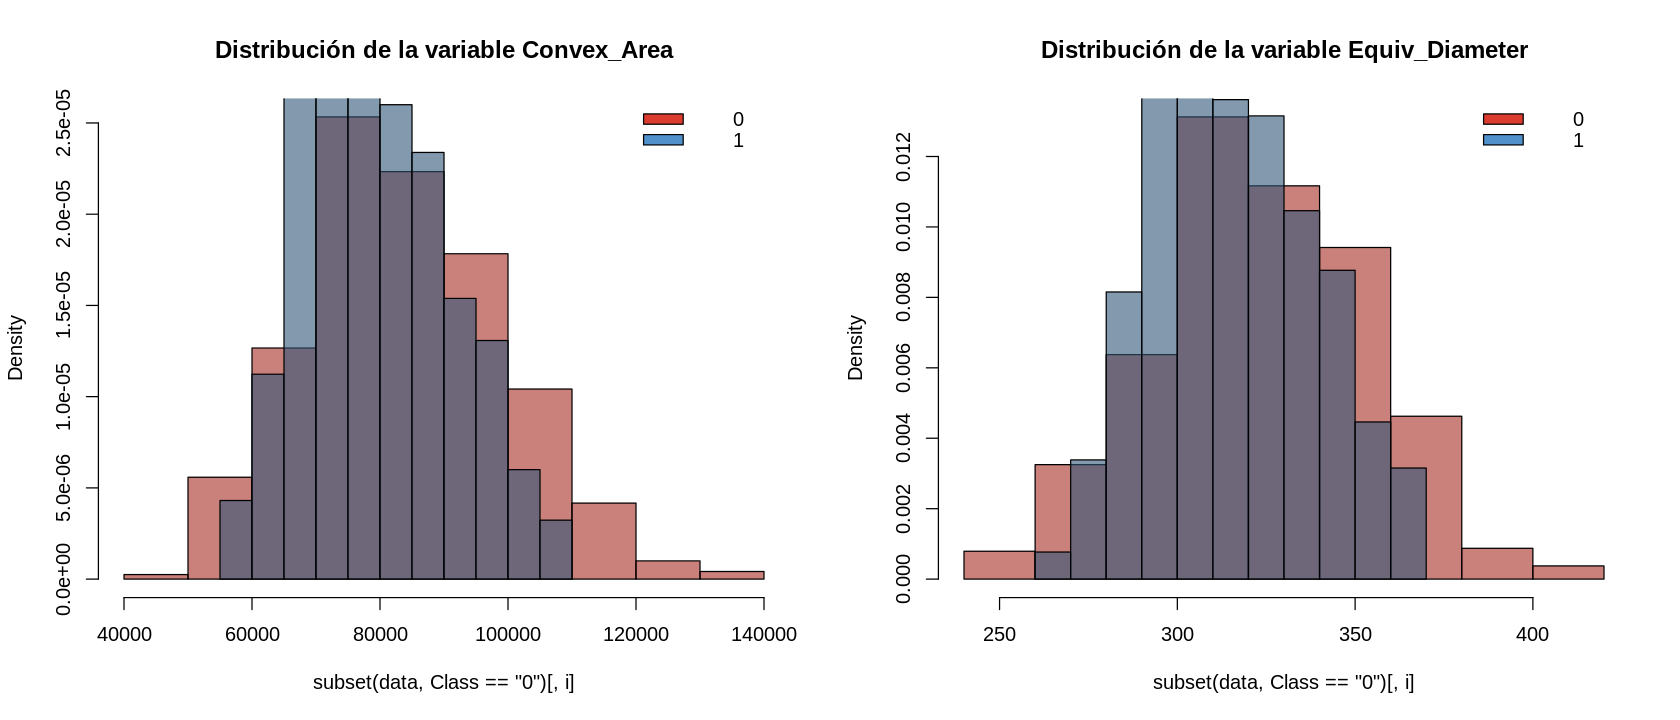

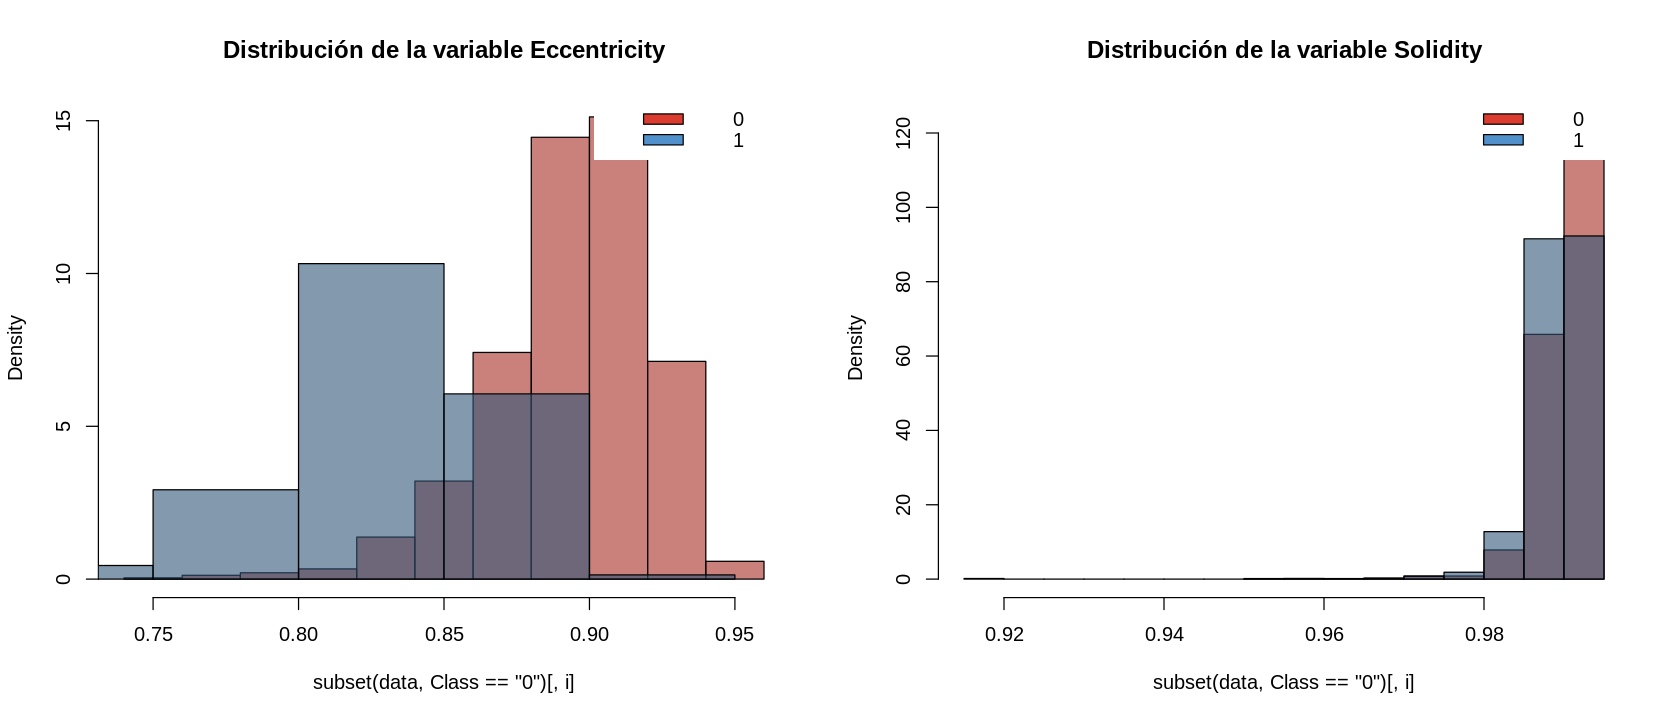

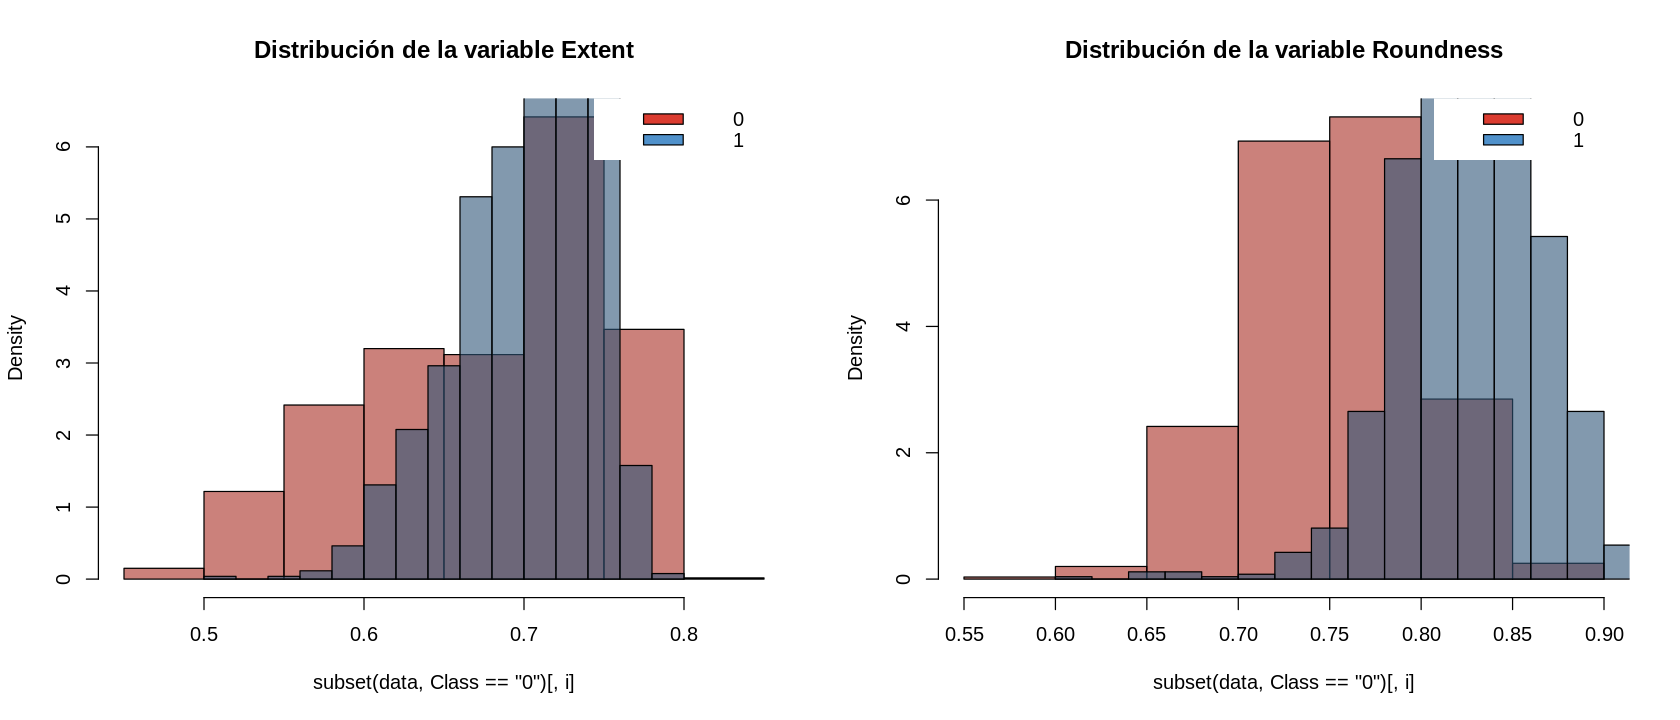

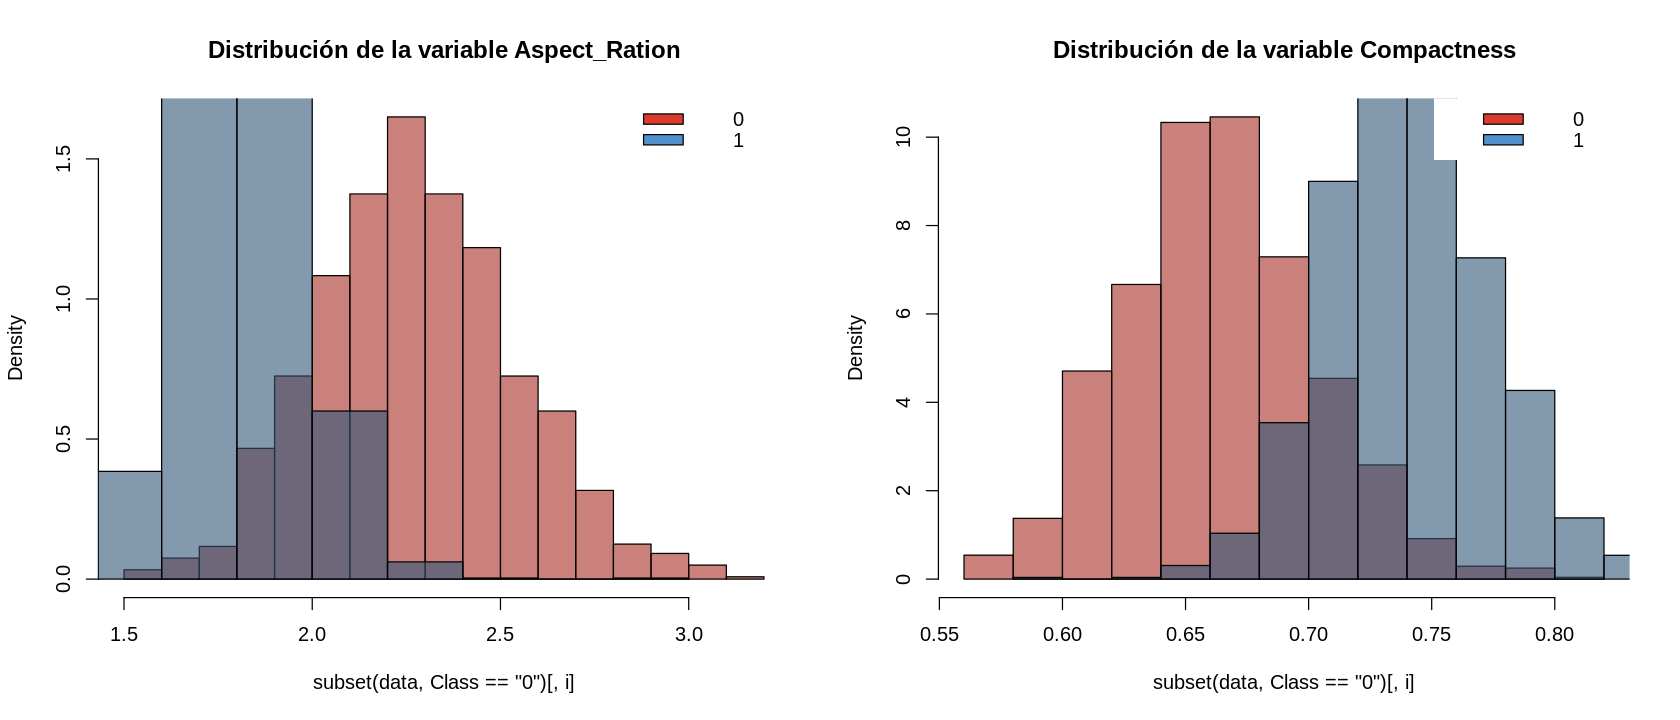

In [79]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

par(mfrow = c(1, 2))
for (i in 1:((length(colnames(data)))-1)) {

  hist(subset(data, Class == '0')[, i],
       col = rgb(0.66,0.18,0.14,0.6),
       main = paste0("Distribución de la variable ", colnames(data)[i]),
       freq = FALSE)
  hist(subset(data, Class == '1')[, i],
     col = rgb(0.187,0.339,0.474,0.6),
       add = TRUE,
       freq = FALSE)
  #abline(v = mean(subset(data_nba_num, TARGET_5Yrs == 1)[, i]), col = '#990000', lwd = 4)
  #abline(v = mean(subset(data_nba_num, TARGET_5Yrs == 0)[, i]), col = '#0b5394', lwd = 4)
  legend(x = "topright", legend = c('0', '1'), fill = c('#db3c30', '#5091cb'), box.lty = "blank")
  if (i %% 2 == 0) {par(mfrow = c(1, 2))}
}

In [80]:
# Modificación de la variable categórica para poder hacer el siguiente gráfico
violin_plot <- data %>%
  mutate_at(vars(Class), as.character)

head(violin_plot)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,1
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,1
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,1
4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,1
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,1
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,1


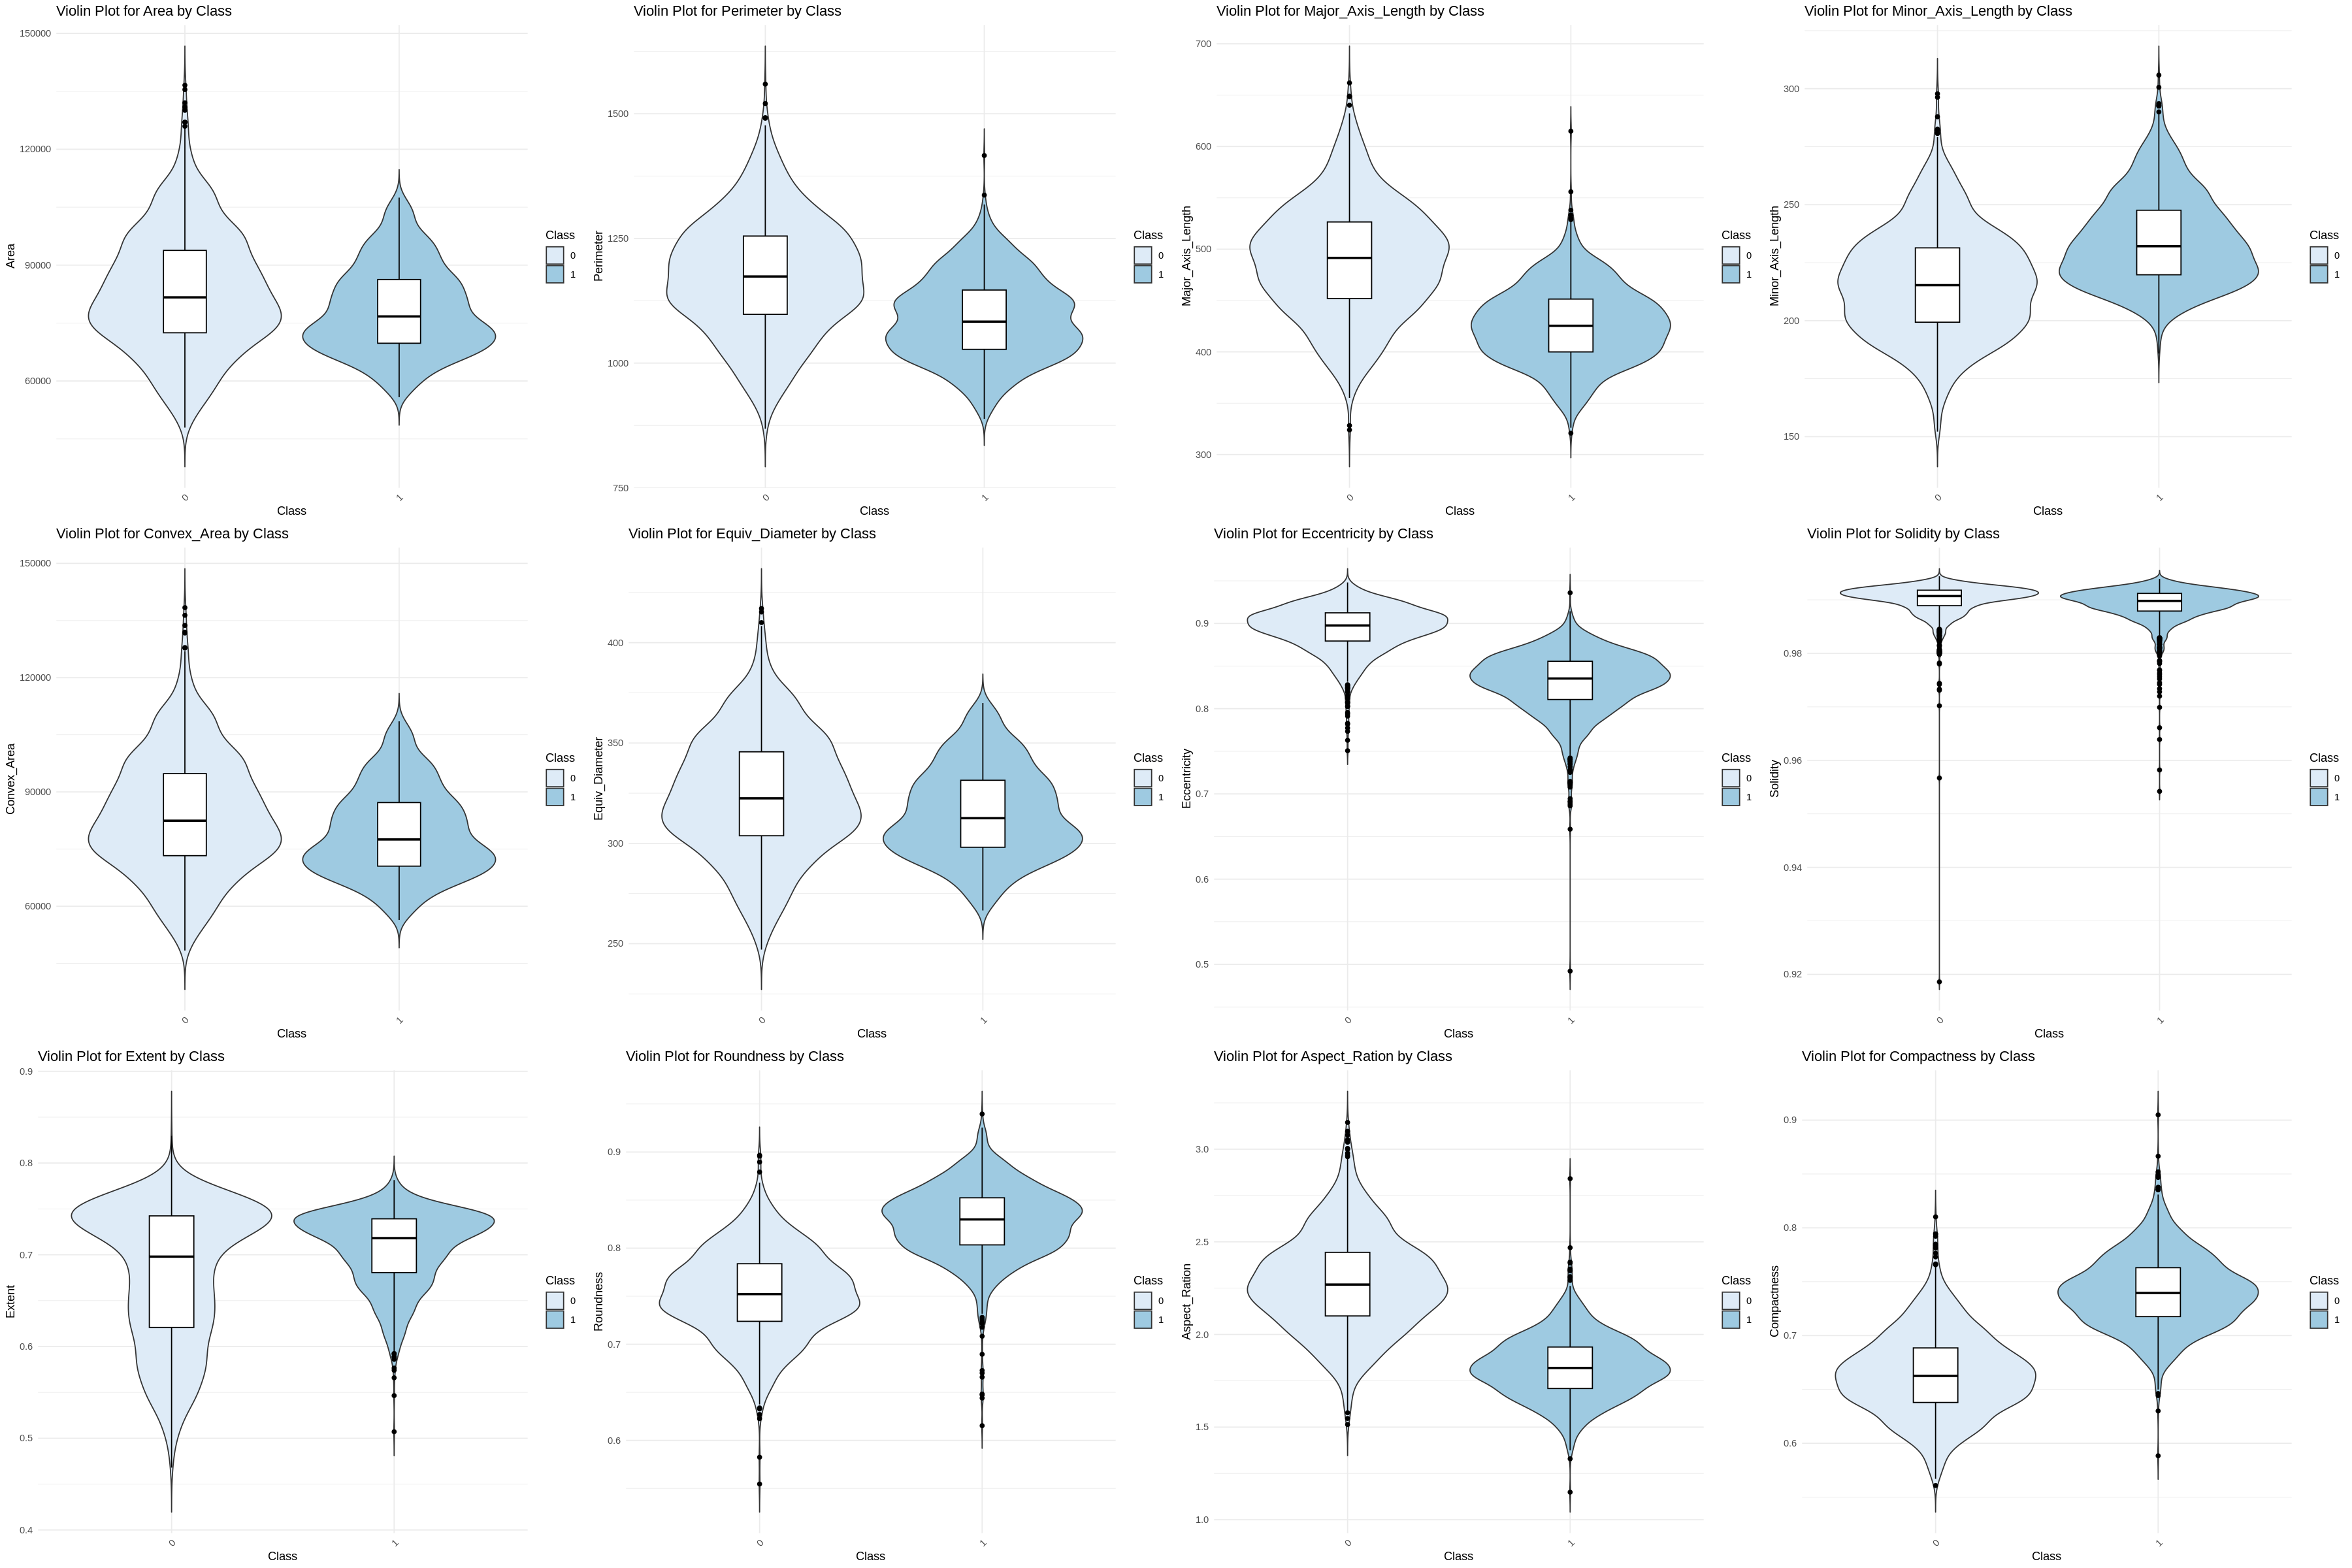

In [81]:
# Graficamos para ver diferencias
cat_var <- 'Class'
num_var <- colnames(data_num)

graphs <- list()

for (var in num_var) {
    plot <- ggplot(violin_plot, aes_string(x = cat_var, y = var, fill = cat_var)) +
      geom_violin(scale = "width", trim = FALSE) +
      geom_boxplot(width = 0.2, fill = "white", color = "black") +
      labs(title = paste("Violin Plot for", var, "by", cat_var),
           x = cat_var,
           y = var) +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
      scale_fill_brewer (palette = 'Blues')

    graphs[[var]] <- plot
  }

options(repr.plot.width = 30, repr.plot.height = 20)
grid.arrange(grobs = graphs, ncol = 4)


A continuación, he investigado de forma gráfica y con dos tipos de gráficos distintos las diferencias estadísticas en cada variable entre las dos clases de la variable objetivo.

En el primer gráfico sobreponemos histogramas para comparar las distribuciones, en el segundo comparamos los gráficos de violín de las dos distribuciones y como se ubican en una escala vertical común.

A simple vista, hay diversas variables donde las diferencias son muy evidentes, probablemente donde más se ve es en Roundness, Eccentricity, Aspect_Ration y Compactness.

Tengo que confesar, que para este caso me ha parecido mejor y vas visual el primer conjunto de gráficos.

# 3. Elección de variables:

- **3.1 Análisis de la información mutua**



El análisis de información mutua se calcula entre las variables potencialmente predictivas y la variable objetivo y mide la reducción de incertidumbre para una variable sabiendo el valor de la otra.

Para ello, en clase vimos que se podían usar tres tipos distintos de algoritmos que deberían dar unos resultados muy parecidos, a continuación nos aplicaremos los tres, compararemos los resultados y empezaremos a elegir qué variables nos servirán mejor para nuestro modelo

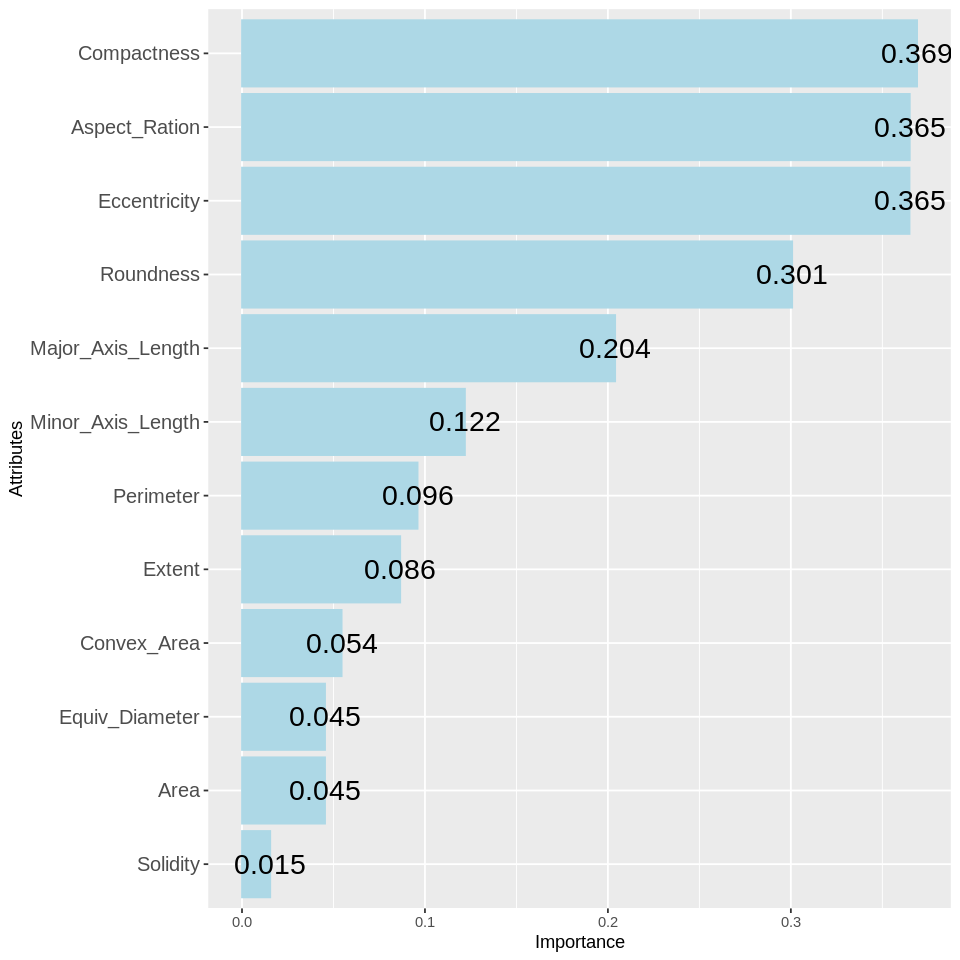

In [82]:
options(repr.plot.width = 8, repr.plot.height = 8 )
ig = information_gain(formula = Class ~ .
                     , data = data
                     , type = 'infogain')

ggplot(ig, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "lightblue", color = "lightblue") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

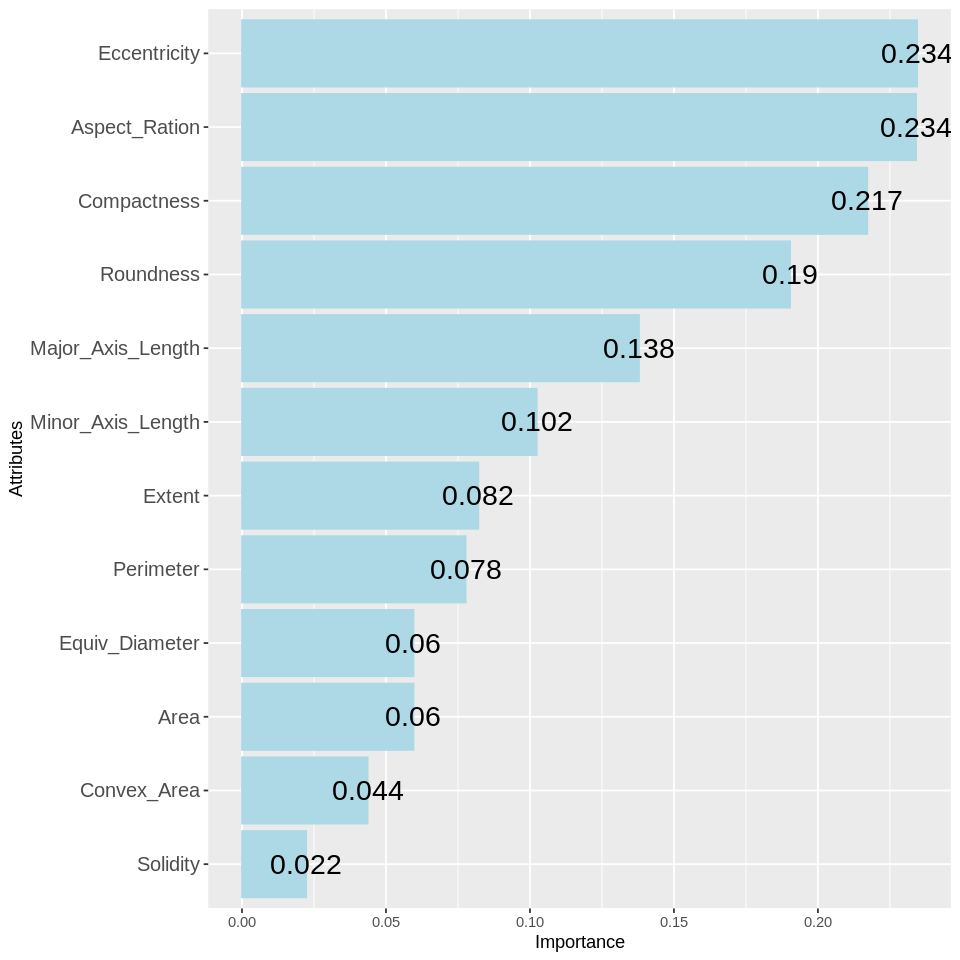

In [83]:
gr = information_gain(formula = Class ~ .
                     , data = data
                     , type = 'gainratio')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "lightblue", color = "lightblue") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

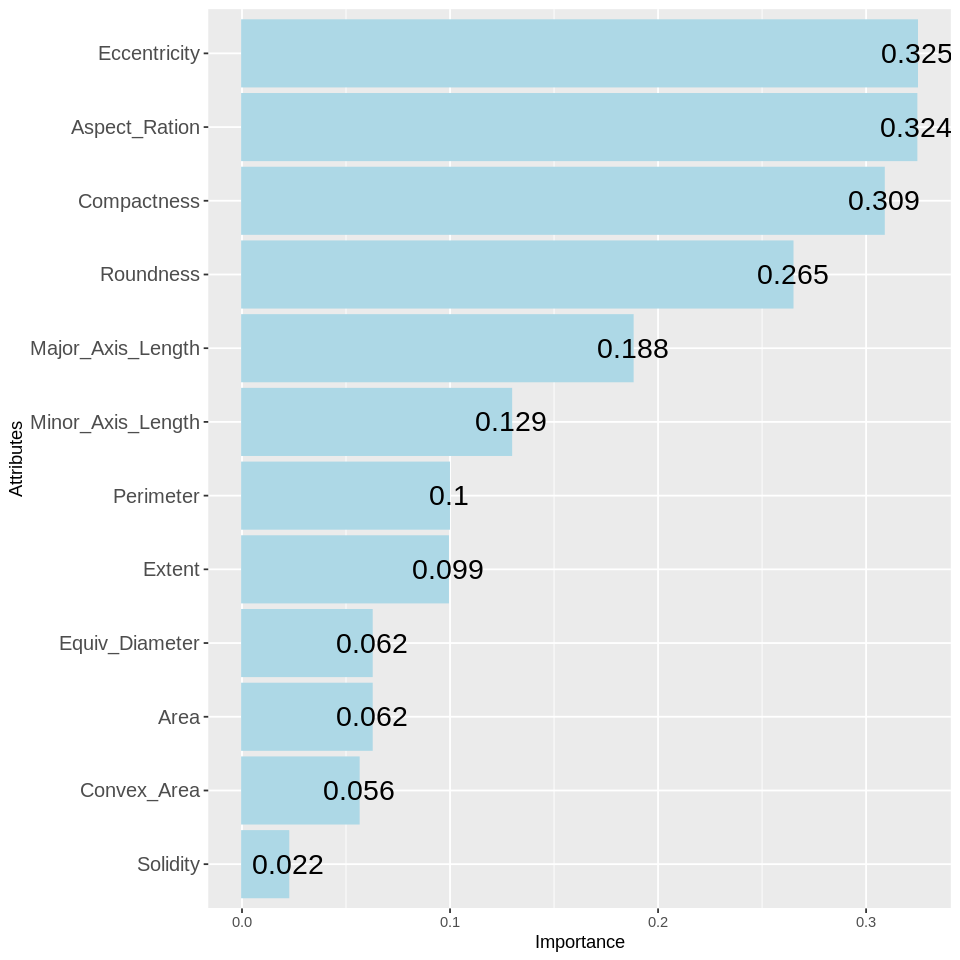

In [84]:
sym = information_gain(formula = Class ~ .
                     , data = data
                     , type = 'symuncert')

ggplot(sym, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "lightblue", color = "lightblue") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

In [85]:
result_dataframe <- data.frame(
  Info_Gain = ig,
  Gain_Ratio = gr,
  Sym_Uncert = sym
)

result_dataframe <- subset(result_dataframe, select = c(1, 2, 4, 6))
colnames(result_dataframe)[1] = 'Variables'
colnames(result_dataframe)[2] = 'Info Gain'
colnames(result_dataframe)[3] = ' Gain Ratio'
colnames(result_dataframe)[4] = 'Sym Uncert'

# Calcular la media de los resultados
result_dataframe$Average <- rowMeans(result_dataframe[, c(2, 3, 4)])

# Ordenar de mayor a menor impacto
result_dataframe <- result_dataframe[order(-result_dataframe$Average), ]

result_dataframe


,Variables,Info Gain,Gain Ratio,Sym Uncert,Average
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7,Eccentricity,0.36486806,0.23444987,0.32452618,0.30794803
11,Aspect_Ration,0.36499431,0.23409267,0.32421831,0.30776843
12,Compactness,0.36900703,0.21713300,0.30856029,0.29823344
10,Roundness,0.30071927,0.19033501,0.26468340,0.25191256
3,Major_Axis_Length,0.20396318,0.13786840,0.18783286,0.17655481
4,Minor_Axis_Length,0.12185816,0.10234766,0.12943140,0.11787907
2,Perimeter,0.09597464,0.07765816,0.09954806,0.09106029
9,Extent,0.08649121,0.08206954,0.09906084,0.08920720
1,Area,0.04537700,0.05954725,0.06240046,0.05577490


Una vez tenemos los resultados, he decidido agruparlos en una misma tabla y ordenarlos de mayor a menor importancia combinando los resultados de los tres algoritmos.

De cara a descartar variables, eliminaremos las tres variables que el hecho de conocerlas, menos información nos da sobre la variable objetivo. Todas ellas nos dan menos de un 0,055 de media comparando los tres principales métodos que tenemos para calcular esto:

- Equiv_Diameter
- Convex_Area
- Solidity

In [86]:
data$Equiv_Diameter <- NULL
data$Convex_Area <- NULL
data$Solidity <- NULL

head(data)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,56276,888.242,326.1485,220.2388,0.7376,0.7453,0.8963,1.4809,0.8207,1
2,76631,1068.146,417.1932,234.2289,0.8275,0.7151,0.8440,1.7811,0.7487,1
3,71623,1082.987,435.8328,211.0457,0.8749,0.7400,0.7674,2.0651,0.6929,1
4,66458,992.051,381.5638,222.5322,0.8123,0.7396,0.8486,1.7146,0.7624,1
5,66107,998.146,383.8883,220.4545,0.8187,0.6752,0.8338,1.7413,0.7557,1
6,73191,1041.460,405.8132,231.4261,0.8215,0.7165,0.8480,1.7535,0.7522,1


In [87]:
# Tambien eliminaremos estas variables del dataset data_num que necesitaremos para alguna visualización
data_num$Equiv_Diameter <- NULL
data_num$Convex_Area <- NULL
data_num$Solidity <- NULL

**3.2. Análisis de Correlación**

Las variables con una gran correlación son más linearmente dependientes y por ello generan el mismo efecto. Sabiendo esto, suponemos que tener dos variables muy correladas puede llegar a multiplicar un efecto y para evitarlo, es probable que haya que descartar una de ellas.

Por otro lado, también nos interesará conocer las correlaciones entre las variables y la variable objetivo, para ver cuáles pueden estar dándonos más información sobre ella y seguir intuyendo cosas que nos podemos encontrar al crear el modelo.

In [88]:
correlation_matrix = round(cor(data),2)

class_correlation <- round(correlation_matrix['Class', ],2)
class_df <- data.frame(Correlation = class_correlation)

cat('Correlación de todas las variables con la variable catégorica Class:\n\n' )
print(class_df)



Correlación de todas las variables con la variable catégorica Class:

                  Correlation
Area                    -0.17
Perimeter               -0.39
Major_Axis_Length       -0.56
Minor_Axis_Length        0.40
Eccentricity            -0.70
Extent                   0.24
Roundness                0.67
Aspect_Ration           -0.72
Compactness              0.73
Class                    1.00


Aquí vemos que hay 5 variables que estan bastante correlacionadas con la variable objetivo así que merecerá la pena tenerlas en cuenta, las varaibles son:
- Eccentricity
- Roundness
- Aspect_Ration
- Compactness
- Major_Axis_Length

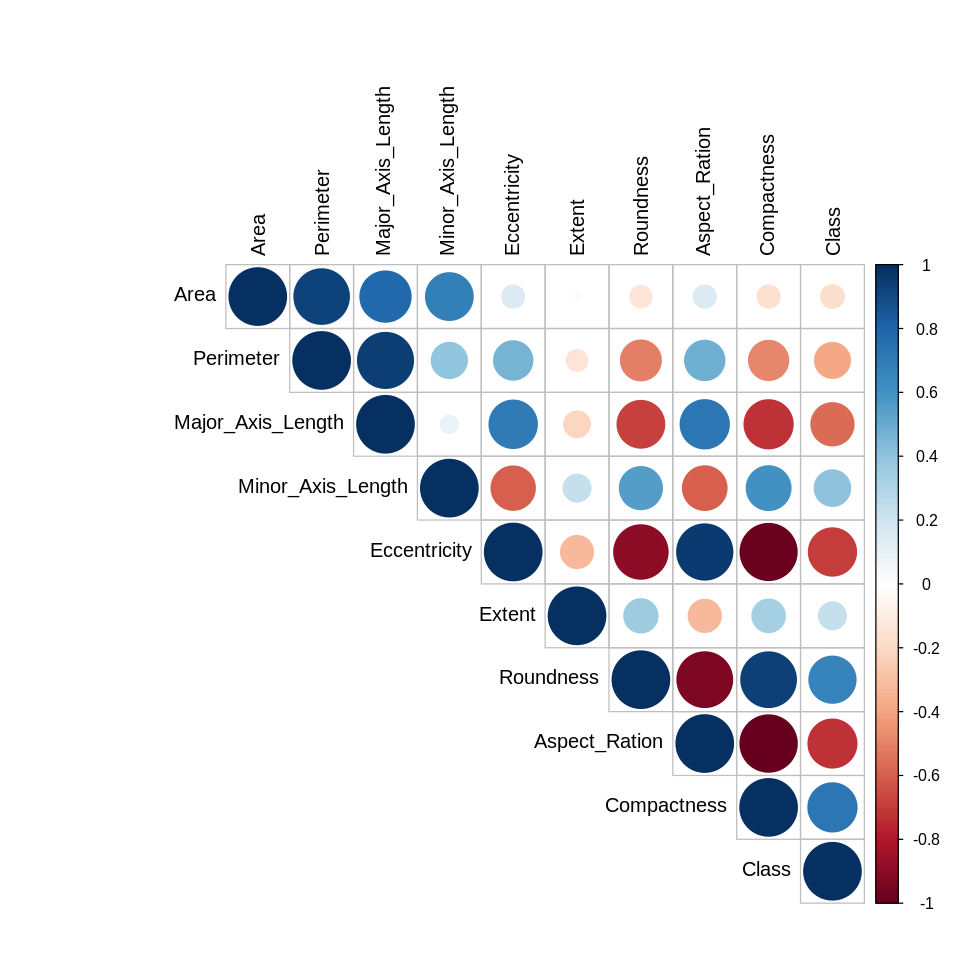

In [89]:
options(repr.plot.width = 8,
  repr.plot.height = 8 )
corrplot::corrplot(cor(data)
                   , type = "upper"
                   , number.cex = .6
                   , tl.col = "black"
                   , tl.srt = 90)

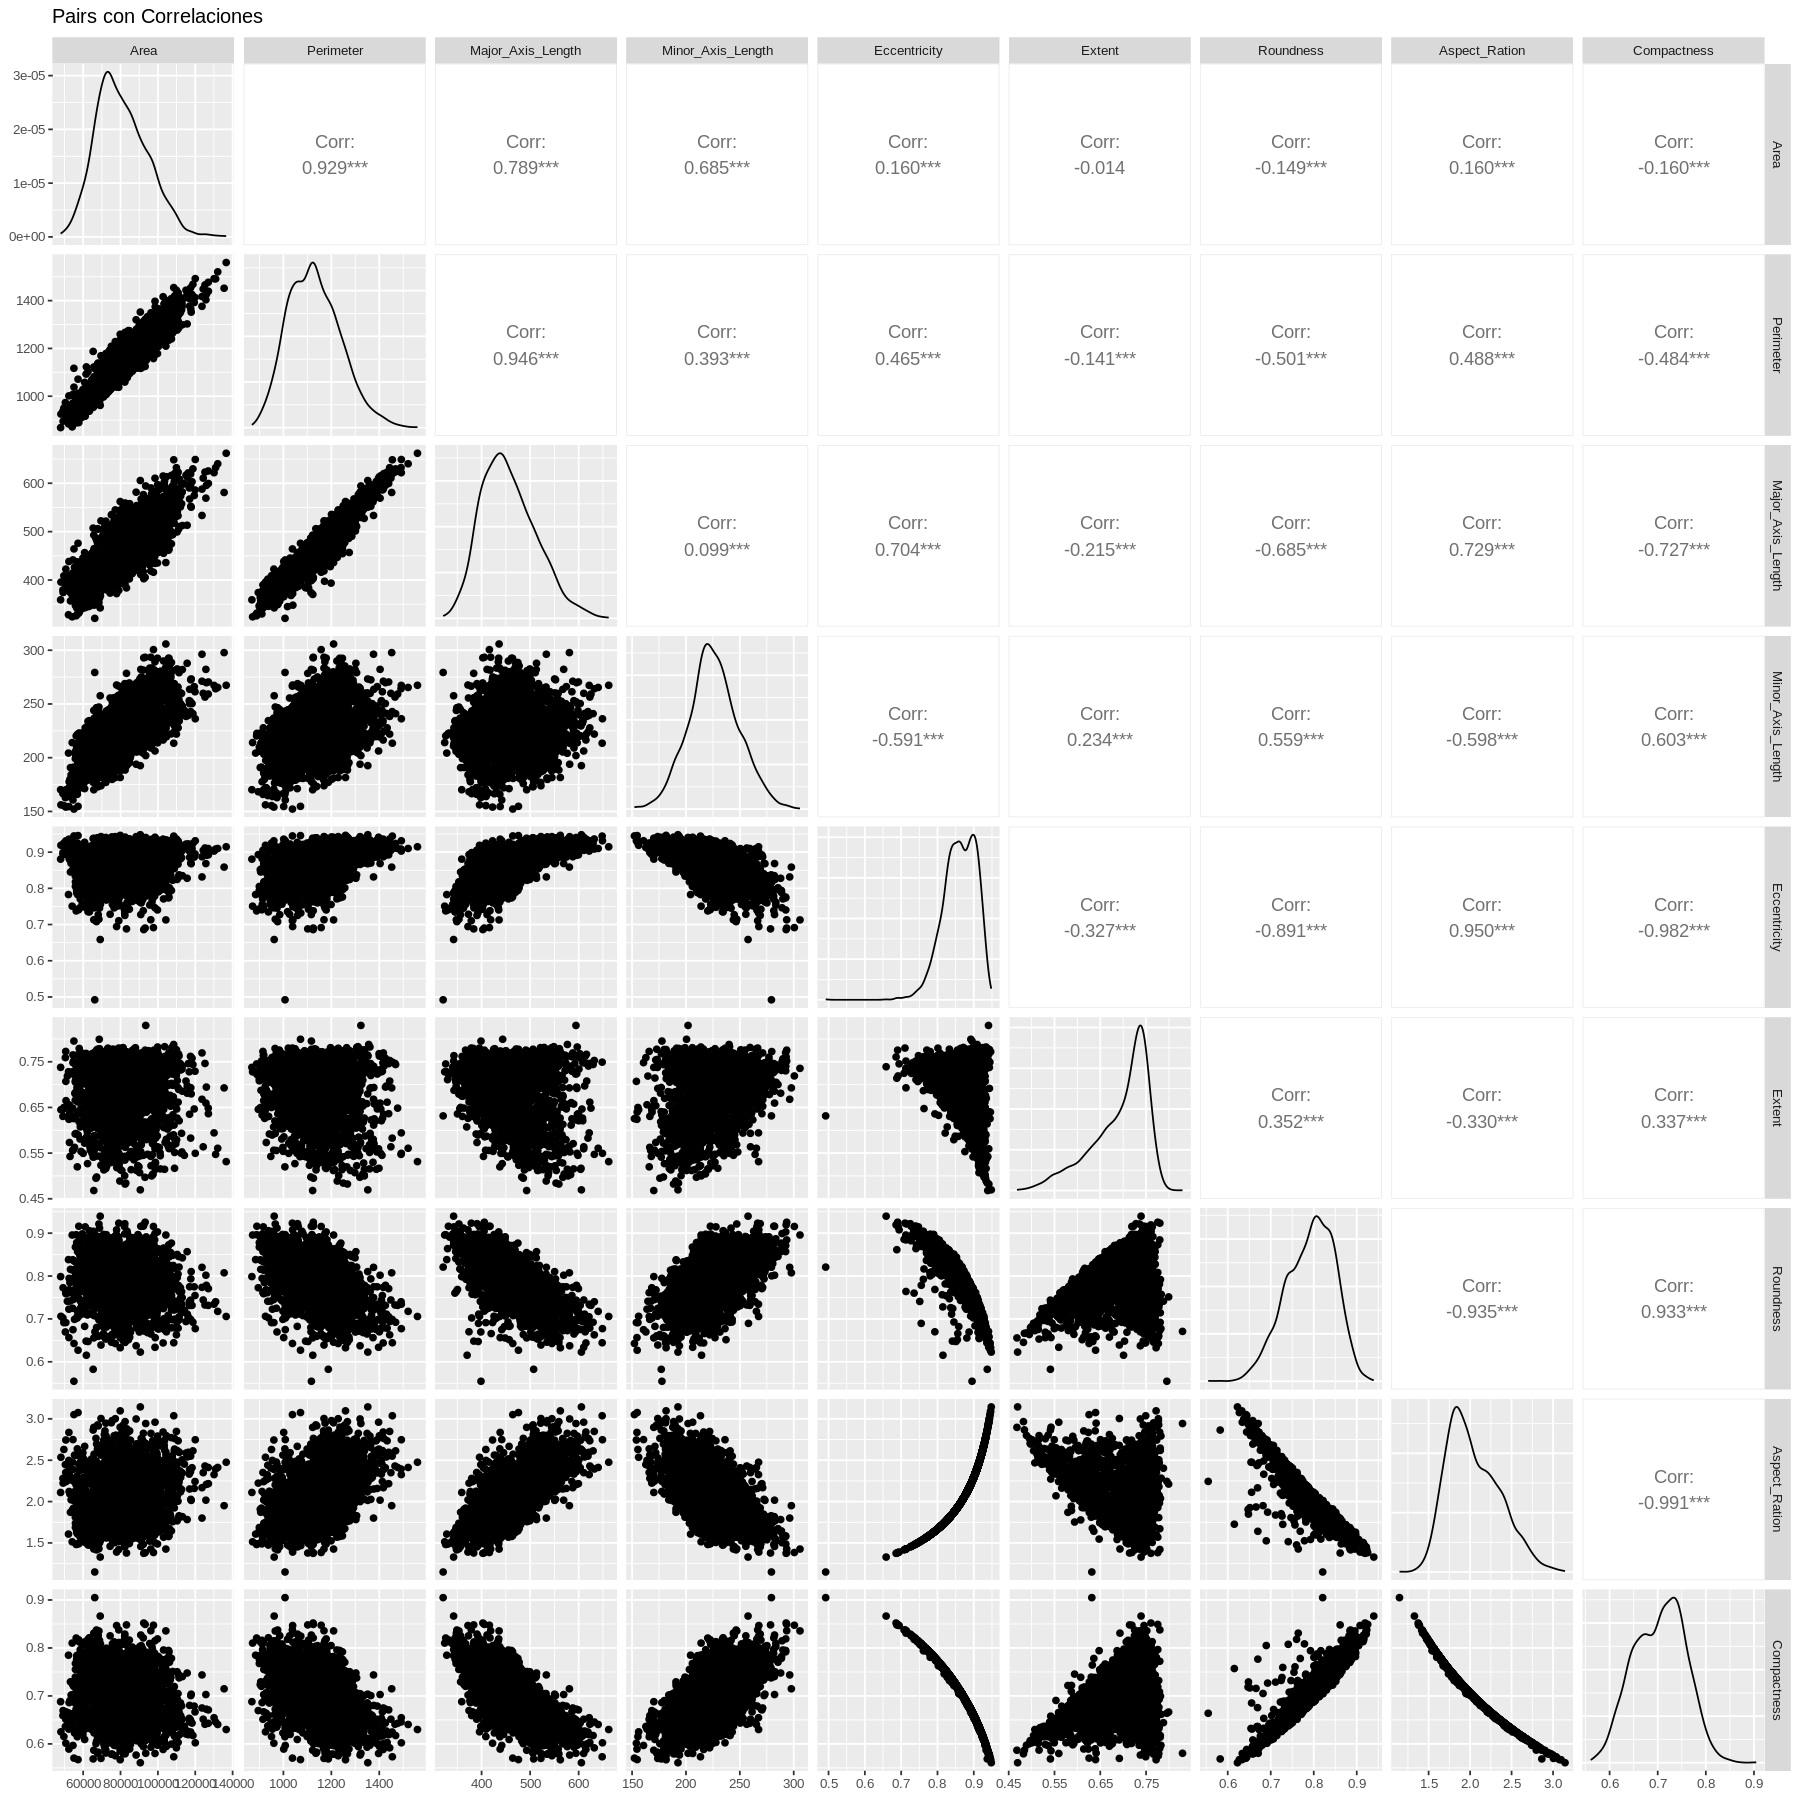

In [90]:
options(
  repr.plot.width = 15,
  repr.plot.height = 15
)

ggpairs(data_num,
        title = 'Pairs con Correlaciones',
        upper = list(continous = wrap ('cor', size = 5, color = 'darkblue'))) +
          theme(
          text = element_text (size = 10),
          axis.text = element_text (size = 8),
          axis.title = element_text(size = 35)
          )

Por otro lado, con este último gráfico podemos observar la correlación entre las variables "descriptivas" que tenemos. El hecho de que algunas de ellas estén muy correlacionadas entre ellas va a hacer que en el fondo, estemos analizando variables que nos indican lo mismo. Vamos a empezar usándolas para ver como funciona, pero corremos el riesgo de estar amplificando mensajes y/o errores. De hecho, es probable que cuando creemos el modelo, alguna de ellas no sea significante y se pueda eliminar.

A continuación tenemos las correlaciones más elevadas.

In [91]:
# Correlaciones con más de 0,75
high_corr_indices <- which(abs(correlation_matrix) > 0.75 & correlation_matrix != 1, arr.ind = TRUE)

# Creamos data frame
high_corr_pairs <- data.frame(
  Variable1 = rownames(correlation_matrix)[high_corr_indices[, 1]],
  Variable2 = colnames(correlation_matrix)[high_corr_indices[, 2]],
  Correlation = correlation_matrix[high_corr_indices]
)

high_corr_pairs <- high_corr_pairs[!duplicated(t(apply(high_corr_pairs, 1, sort))), ]
high_corr_pairs <- high_corr_pairs[order(-high_corr_pairs$Correlation), ]

high_corr_pairs


,Variable1,Variable2,Correlation
,<chr>,<chr>,<dbl>
4,Major_Axis_Length,Perimeter,0.95
8,Aspect_Ration,Eccentricity,0.95
1,Perimeter,Area,0.93
12,Compactness,Roundness,0.93
2,Major_Axis_Length,Area,0.79
7,Roundness,Eccentricity,-0.89
11,Aspect_Ration,Roundness,-0.94
9,Compactness,Eccentricity,-0.98
15,Compactness,Aspect_Ration,-0.99


Una vez hemos visto las variables más correlacionadas con la variable objetivo y las variables potencialmente predictivas relacionadas entre si, tenemos mucha más información sobre como se relacionan entre ellas.

Viendo que muchas de las variables altamente correlacionadas son las variables que también nos dan mucha información sobre la objetivo creo que es mejor asumir el riesgo de no eliminarlas, aunque nos dé información muy parecida (hay que tener en cuenta que cuando hagamos los modelos podremos ver la significancia de las variables y allí igual podemos eliminarlas).

Por otro lado, las que sí que descartaremos son las que están muy poco correlacionadas con la variable objetivo.

In [92]:
# Esta línia de códgio solo es para crear un nuevo dataset que usaré más adelante
data_extra <- data

In [93]:
# En definitiva, correremos el riesgo y escogeremos las variables más correladas con la objectivo
data$Area <- NULL
data$Perimeter <- NULL
data$Minor_Axis_Length <- NULL
data$Extent <- NULL

head(data)

,Major_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,326.1485,0.7376,0.8963,1.4809,0.8207,1
2,417.1932,0.8275,0.8440,1.7811,0.7487,1
3,435.8328,0.8749,0.7674,2.0651,0.6929,1
4,381.5638,0.8123,0.8486,1.7146,0.7624,1
5,383.8883,0.8187,0.8338,1.7413,0.7557,1
6,405.8132,0.8215,0.8480,1.7535,0.7522,1


**3.3. Estudio Componentes Principales**

A continuación, haremos el estudio de componentes principales. En líneas generales, crearemos componentes que describan a la variable objetivo, estos componentes estarán formados en mayor o menor medida por las variables 'predictivas' y habrá que estudiar qué componentes nos dan más información y cuál es la composición de estos.

In [94]:
# Para los componentes necesitaremos el dataset sin la variable objetivo
data_num$Area <- NULL
data_num$Perimeter <- NULL
data_num$Minor_Axis_Length <- NULL
data_num$Extent <- NULL

head(data_num)

,Major_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,326.1485,0.7376,0.8963,1.4809,0.8207
2,417.1932,0.8275,0.8440,1.7811,0.7487
3,435.8328,0.8749,0.7674,2.0651,0.6929
4,381.5638,0.8123,0.8486,1.7146,0.7624
5,383.8883,0.8187,0.8338,1.7413,0.7557
6,405.8132,0.8215,0.8480,1.7535,0.7522


In [95]:
# PCA
correlation_data = cor(data_num)
pca_all = princomp(data_num, cor=TRUE)

summary(pca_all)

Importance of components:
                          Comp.1     Comp.2     Comp.3      Comp.4       Comp.5
Standard deviation     2.1051982 0.64076069 0.34216764 0.198835588 0.0308574467
Proportion of Variance 0.8863719 0.08211485 0.02341574 0.007907118 0.0001904364
Cumulative Proportion  0.8863719 0.96848671 0.99190245 0.999809564 1.0000000000

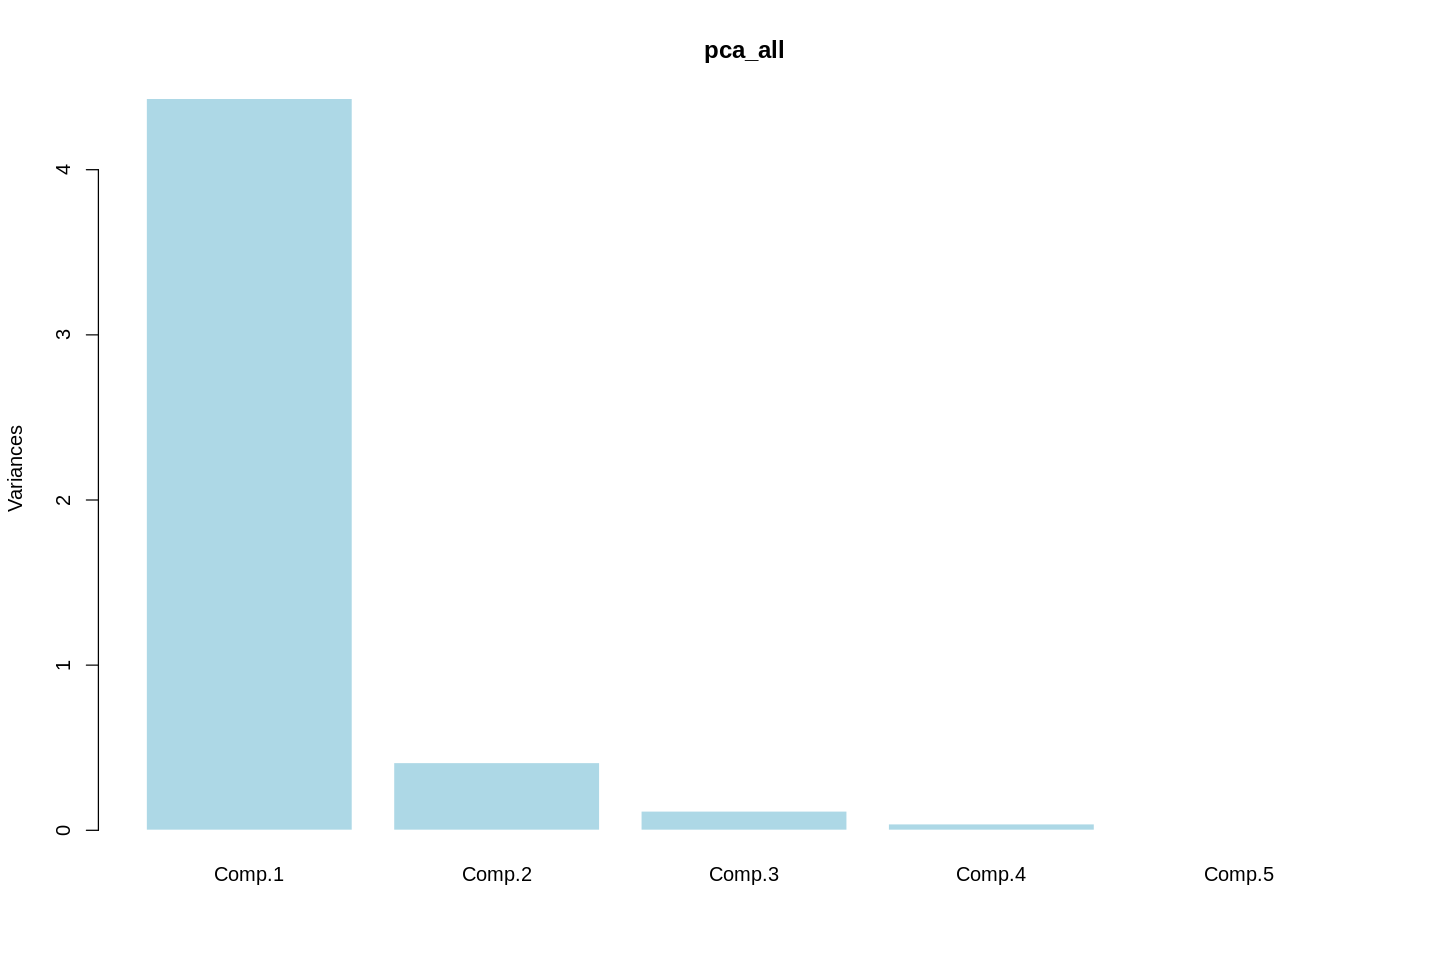

In [96]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot(pca_all,type="bar",col="lightblue", border = FALSE)


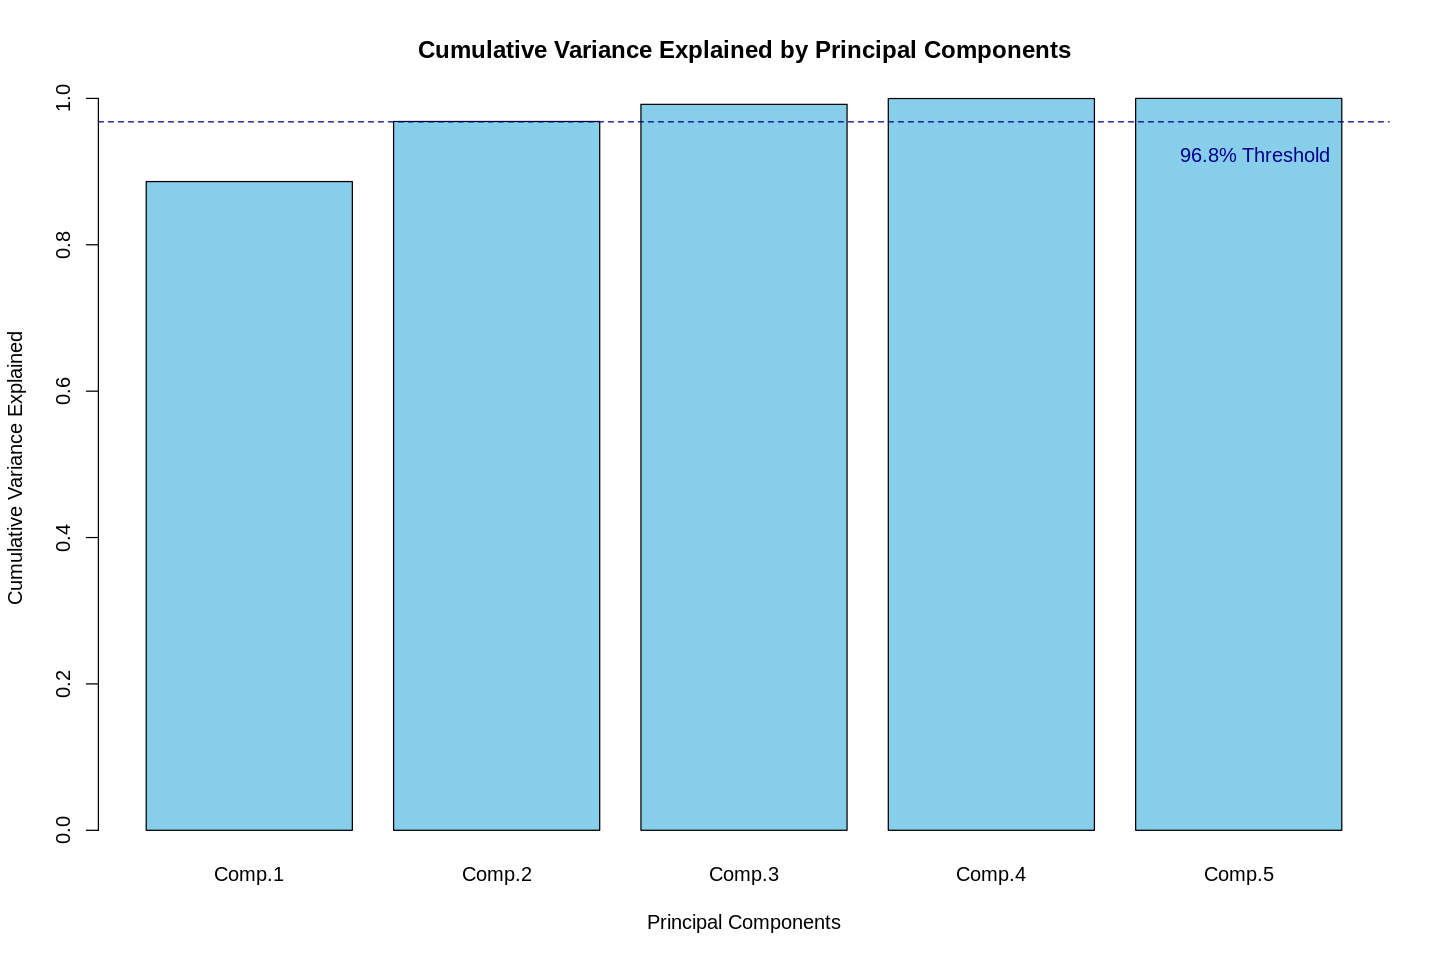

In [97]:
cumulative_variance <- cumsum(pca_all$sdev^2) / sum(pca_all$sdev^2)

# Bar plot
barplot(cumulative_variance, main = "Cumulative Variance Explained by Principal Components",
        xlab = "Principal Components", ylab = "Cumulative Variance Explained",
        col = "skyblue", border = "black")

# Text threshold
abline(h = 0.968, col = "darkblue", lty = 2)

# Text threshold
text(6, 0.92, "96.8% Threshold", pos = 2, col = "darkblue")


In [98]:
cat('Importancia de las variables en cada componente \n')
print(round(pca_all$loadings[, 1:2],3))

Importancia de las variables en cada componente 
                  Comp.1 Comp.2
Major_Axis_Length  0.383  0.923
Eccentricity       0.459 -0.197
Roundness         -0.451  0.219
Aspect_Ration      0.467 -0.165
Compactness       -0.470  0.185


Después de analizar los componentes vemos que con solo los dos primeros componentes tenemos casi un 97% de la varianza de la variable objetivo descrita.

Aun así, observamos que es complicado eliminar demasiadas variables, ya que en el componente uno, todas menos la primera tiene un nivel de importancia similar y en el componente dos, la única que tiene un impacto relevante es la primera.

Si queremos hilar un poco más finos, podemos no seleccionar el segundo componente y seguir nuestro modelo un solo componente, explicando casi un 89% de la varianza objetivo.

Empezaremos probando esta opción.

In [99]:
# Esta linea de código también sirve para crear un dataset que usaremos más adelante
data_extra2 <- data


# Desarollo de un modelo de Regresión Logística

In [100]:
data$Major_Axis_Length = NULL
head(data)

,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.7376,0.8963,1.4809,0.8207,1
2,0.8275,0.8440,1.7811,0.7487,1
3,0.8749,0.7674,2.0651,0.6929,1
4,0.8123,0.8486,1.7146,0.7624,1
5,0.8187,0.8338,1.7413,0.7557,1
6,0.8215,0.8480,1.7535,0.7522,1


In [101]:
# Creamos la partición de los datos
set.seed(89)
inTrain = createDataPartition(y = data$Class
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data.train = data[inTrain,]
data.test = data[-inTrain,]

ytrain = data$Class[inTrain]
ytest = data$Class[-inTrain]

**Training**

In [102]:
# Entrenamos el modelo con las 4 variables
logistica1 = glm(formula = Class ~ Eccentricity + Roundness + Aspect_Ration + Compactness
          , data = data.train
          , family = "binomial")
summary(logistica1)


Call:
glm(formula = Class ~ Eccentricity + Roundness + Aspect_Ration + 
    Compactness, family = "binomial", data = data.train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -108.464     50.437  -2.151   0.0315 *  
Eccentricity    60.227     14.601   4.125 3.71e-05 ***
Roundness       -9.948      4.288  -2.320   0.0203 *  
Aspect_Ration   -3.058      5.485  -0.558   0.5772    
Compactness    100.109     42.746   2.342   0.0192 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2770.9  on 1999  degrees of freedom
Residual deviance: 1300.3  on 1995  degrees of freedom
AIC: 1310.3

Number of Fisher Scoring iterations: 10


Los resultados nos dicen que hay una variable (Aspect_Ration) que no tiene significancia, lo observamos porque el p-valor es superior a 0,05. Por tanto no la tendremos en cuenta en el siguiente modelo.

In [103]:
# Eliminamos la variable Aspect_Ration
logistica2 = glm(formula = Class ~ Eccentricity + Roundness + Compactness
          , data = data.train
          , family = "binomial")
summary(logistica2)


Call:
glm(formula = Class ~ Eccentricity + Roundness + Compactness, 
    family = "binomial", data = data.train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -135.343     15.154  -8.931  < 2e-16 ***
Eccentricity   66.117     10.136   6.523 6.88e-11 ***
Roundness     -10.678      4.088  -2.612  0.00899 ** 
Compactness   123.114     11.558  10.652  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2770.9  on 1999  degrees of freedom
Residual deviance: 1300.7  on 1996  degrees of freedom
AIC: 1308.7

Number of Fisher Scoring iterations: 6


In [104]:
# Generamos predicciones
logistica2_prob = predict(logistica2, type = 'response')
head(logistica2_prob)

1         2         5         6         7         9 
0.9925543 0.9262732 0.9488114 0.9256896 0.9730837 0.7153181

In [105]:
# Vemos predicciones
logistica2_pred = ifelse(logistica2_prob > 0.5, 1, 0)
head(logistica2_pred)

1 2 5 6 7 9 
1 1 1 1 1 1

In [106]:
confusionMatrix(as.factor(logistica2_pred), as.factor(data.train$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 807 106
         1 164 923
                                          
               Accuracy : 0.865           
                 95% CI : (0.8492, 0.8797)
    No Information Rate : 0.5145          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7293          
                                          
 Mcnemar's Test P-Value : 0.0005226       
                                          
            Sensitivity : 0.8311          
            Specificity : 0.8970          
         Pos Pred Value : 0.8839          
         Neg Pred Value : 0.8491          
             Prevalence : 0.4855          
         Detection Rate : 0.4035          
   Detection Prevalence : 0.4565          
      Balanced Accuracy : 0.8640          
                                          
       'Positive' Class : 0               
                              

Una vez obtenemos un modelo en el que todas las variables tienen significancia, lo entrenamos y observamos los resultados.

No son para nada malos, podemos ver que la precisión del modelo es del 86,5%, los intervalos de confianza son de entre 85% y 88%.

Por otro lado, también podemos ver la matriz de confusión, donde vemos los datos que predecimos contra los datos que realmente son. Allí vemos que acertamos en la mayoría de los resultados y en que clase fallamos más:
- 923 0 verdaderos
- 164 observaciones que el modelo ha predicho incorrectamente la clase 0
- 807 1 verdaderos
- 106 observaciones que el modelo ha predicho incorrectamente la clase 1

Es decir, el modelo se equivoca más prediciendo a la clase 1 que a la clase 0. El 15% de las observaciones que son 1 las predice como 0.

**Testing**

In [107]:
logistica2_pred= predict(logistica2,newdata = data.test, type="response")
logistica2_pred_test = ifelse(logistica2_pred > 0.5, 1, 0)
confusionMatrix(as.factor(logistica2_pred_test), as.factor(data.test$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 193  32
         1  36 239
                                          
               Accuracy : 0.864           
                 95% CI : (0.8308, 0.8928)
    No Information Rate : 0.542           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7257          
                                          
 Mcnemar's Test P-Value : 0.716           
                                          
            Sensitivity : 0.8428          
            Specificity : 0.8819          
         Pos Pred Value : 0.8578          
         Neg Pred Value : 0.8691          
             Prevalence : 0.4580          
         Detection Rate : 0.3860          
   Detection Prevalence : 0.4500          
      Balanced Accuracy : 0.8624          
                                          
       'Positive' Class : 0               
                              

Una vez testeamos el modelo, observamos que los resultados con el dataset de testing son prácticamente los mismos, la precisión es del 86%.

La diferencia principal es que aunque está muy equilibrado, y seguimos teniendo más errores totales prediciendo 1 cuando la realidad es que el valor es 0, ahora a nivel relativo (con el total de observaciones de cada clase) nos equivocamos un poco más con las observaciones que son de la clase 0 y las predecimos como 1.

# Extra

Tengo dudas sobre un par de las decisiones que he tomado. No tengo claro si la eliminación de las variables con el estudio de correlación ha sido una gran decisión y quiero probar de ver los resultados que podemos obtener manteniendo esas variables y haciendo un PCA con todas ellas.

Por otro lado, creo no hubiera estado mal probar el modelo con las 5 variables restantes antes de eliminar la primera variable con el PCA, igual obteníamos mejores resultados, ya que esa variable nos ayudaba a llegar al 96% de explicación de la varianza.

**Primera prueba**

Vamos a probar usando todas las variables para hacer el PCA:

(Hay que tener en cuenta que seguimos excluyendo las variables que al inicio de todo el análisis hemos visto que tenían casi 0 información mutua con la variable objetivo)

In [108]:
head(data_extra)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,56276,888.242,326.1485,220.2388,0.7376,0.7453,0.8963,1.4809,0.8207,1
2,76631,1068.146,417.1932,234.2289,0.8275,0.7151,0.8440,1.7811,0.7487,1
3,71623,1082.987,435.8328,211.0457,0.8749,0.7400,0.7674,2.0651,0.6929,1
4,66458,992.051,381.5638,222.5322,0.8123,0.7396,0.8486,1.7146,0.7624,1
5,66107,998.146,383.8883,220.4545,0.8187,0.6752,0.8338,1.7413,0.7557,1
6,73191,1041.460,405.8132,231.4261,0.8215,0.7165,0.8480,1.7535,0.7522,1


In [109]:
Class <- "Class"
data_extra_num <- subset(data_extra, select = -Class)

In [110]:
# PCA
correlation_data_extra = cor(data_extra_num)
pca_all_extra = princomp(data_extra_num, cor=TRUE)

summary(pca_all_extra)


Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     2.2982681 1.6379389 0.92462637 0.35517674 0.212681636
Proportion of Variance 0.5868929 0.2980938 0.09499266 0.01401672 0.005025942
Cumulative Proportion  0.5868929 0.8849867 0.97997936 0.99399608 0.999022021
                            Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.074645341 0.0454666855 0.0326464972 9.842083e-03
Proportion of Variance 0.000619103 0.0002296911 0.0001184215 1.076296e-05
Cumulative Proportion  0.999641124 0.9998708155 0.9999892370 1.000000e+00

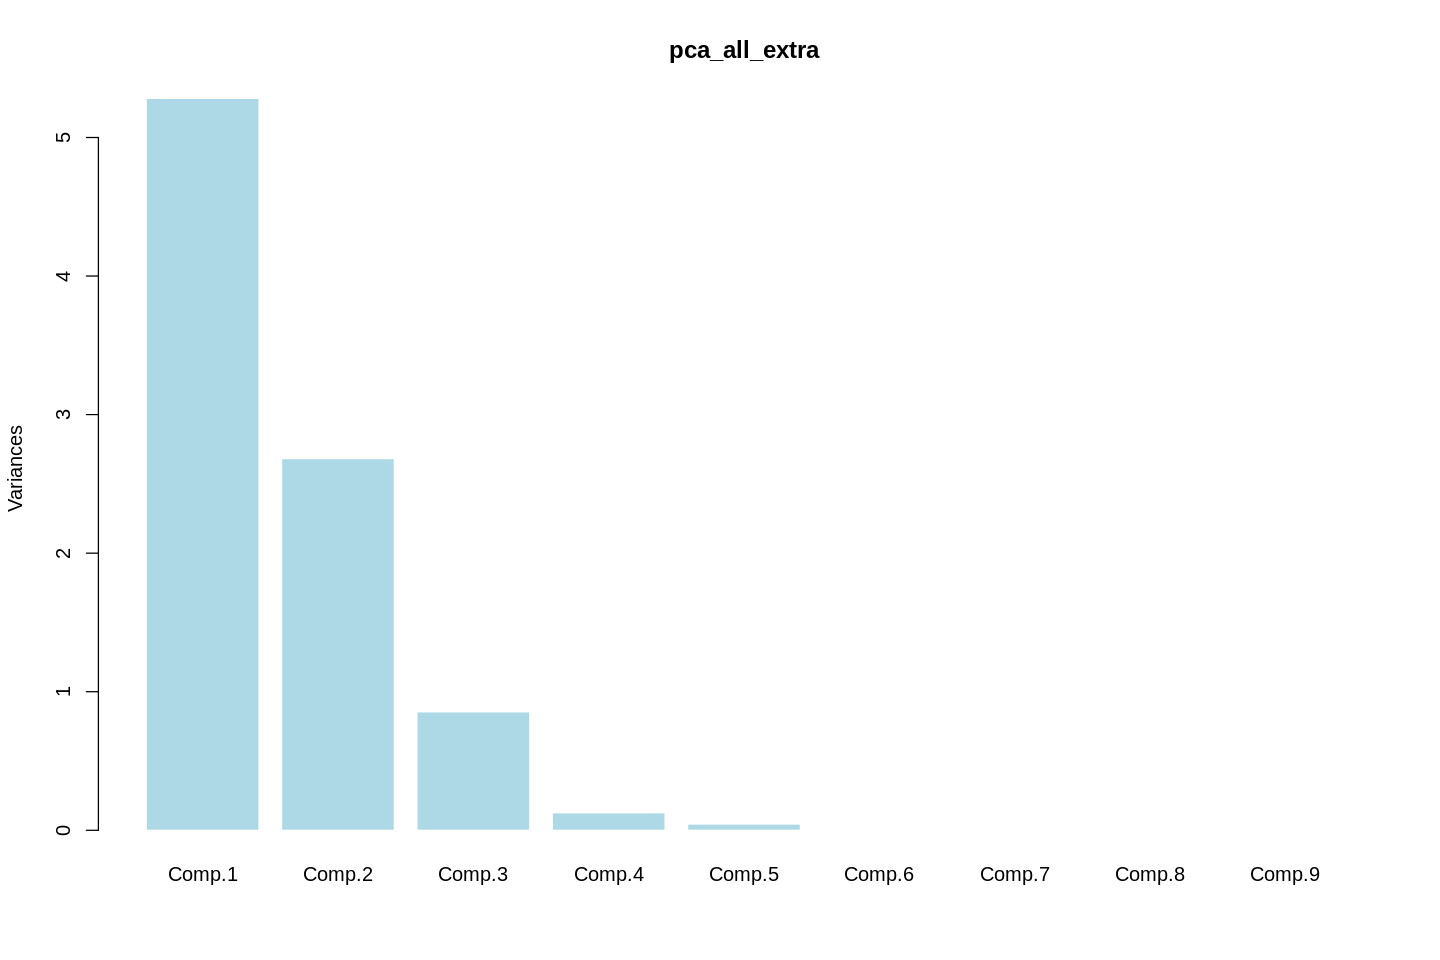

In [111]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot(pca_all_extra,type="bar",col="lightblue", border = FALSE)

In [112]:
cat('Importancia de las variables en cada componente \n')
print(round(pca_all_extra$loadings[, 1:3],3))

Importancia de las variables en cada componente 
                  Comp.1 Comp.2 Comp.3
Area               0.167  0.562  0.028
Perimeter          0.296  0.445  0.004
Major_Axis_Length  0.376  0.303 -0.042
Minor_Axis_Length -0.174  0.556  0.094
Eccentricity       0.411 -0.139 -0.095
Extent            -0.169  0.105 -0.979
Roundness         -0.405  0.128  0.049
Aspect_Ration      0.418 -0.137 -0.098
Compactness       -0.421  0.140  0.093


Los componentes más importantes son los tres primeros (ahora seremos lo más generosos posible), ya que nos ayudan a describir un 98% de la varianza.

Y las variables más importantes en estos componentes son:

PC1
- Eccentricity
- Roundness
- Aspecte Ratio
- Compactness
- Major_Axis_Length

PC2
- Area
- Minor_Axis_Length

PC3
- Extent

Realmente es un poco riguroso seguir con todas estas variables porque concretamente las tres que más importancia tienen en los componentes 2 y 3 son variables que en el análisis de información mutua daban bastantes malos resultados. Pero queremos probar todas las opciones para intentar obtener el mejor modelo posible.

In [113]:
data_extra <- subset(data_extra, select = c(Roundness, Aspect_Ration, Compactness, Major_Axis_Length, Minor_Axis_Length, Area, Extent, Eccentricity, Class))
head(data_extra)

,Roundness,Aspect_Ration,Compactness,Major_Axis_Length,Minor_Axis_Length,Area,Extent,Eccentricity,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,0.8963,1.4809,0.8207,326.1485,220.2388,56276,0.7453,0.7376,1
2,0.8440,1.7811,0.7487,417.1932,234.2289,76631,0.7151,0.8275,1
3,0.7674,2.0651,0.6929,435.8328,211.0457,71623,0.7400,0.8749,1
4,0.8486,1.7146,0.7624,381.5638,222.5322,66458,0.7396,0.8123,1
5,0.8338,1.7413,0.7557,383.8883,220.4545,66107,0.6752,0.8187,1
6,0.8480,1.7535,0.7522,405.8132,231.4261,73191,0.7165,0.8215,1


**Modelos Logísticos**

In [114]:
set.seed(89)
inTrain = createDataPartition(y = data_extra$Class
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data_extra.train = data_extra[inTrain,]
data_extra.test = data_extra[-inTrain,]

ytrain_extra = data_extra$Class[inTrain]
ytest_extra = data_extra$Class[-inTrain]

In [115]:
# Modelo las variables
logistica3 = glm(formula = Class ~ Eccentricity + Roundness + Aspect_Ration + Compactness + Major_Axis_Length + Minor_Axis_Length + Area + Extent
          , data = data_extra.train
          , family = "binomial")
summary(logistica3)


Call:
glm(formula = Class ~ Eccentricity + Roundness + Aspect_Ration + 
    Compactness + Major_Axis_Length + Minor_Axis_Length + Area + 
    Extent, family = "binomial", data = data_extra.train)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.938e+02  5.808e+01  -5.060 4.20e-07 ***
Eccentricity       1.119e+02  1.779e+01   6.290 3.18e-10 ***
Roundness         -7.038e+00  4.727e+00  -1.489 0.136473    
Aspect_Ration     -1.248e+00  6.186e+00  -0.202 0.840068    
Compactness        1.930e+02  4.696e+01   4.110 3.96e-05 ***
Major_Axis_Length  1.889e-01  3.516e-02   5.372 7.79e-08 ***
Minor_Axis_Length  2.495e-01  6.415e-02   3.889 0.000101 ***
Area              -8.949e-04  1.311e-04  -6.825 8.81e-12 ***
Extent            -1.068e+00  1.427e+00  -0.748 0.454196    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2770.9  on 1999  degrees of freed

Vemos que el modelo nos dice que solo algunas variables tienen significancia, así que volveremos a generar uno, pero esta vez solo con las variables importantes.

In [116]:
# Modelo las variables
logistica4 = glm(formula = Class ~ Eccentricity + Compactness + Major_Axis_Length + Minor_Axis_Length + Area
          , data = data_extra.train
          , family = "binomial")
summary(logistica4)


Call:
glm(formula = Class ~ Eccentricity + Compactness + Major_Axis_Length + 
    Minor_Axis_Length + Area, family = "binomial", data = data_extra.train)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.902e+02  3.717e+01  -7.807 5.84e-15 ***
Eccentricity       1.075e+02  1.295e+01   8.299  < 2e-16 ***
Compactness        1.772e+02  3.247e+01   5.457 4.84e-08 ***
Major_Axis_Length  1.850e-01  3.367e-02   5.495 3.90e-08 ***
Minor_Axis_Length  2.788e-01  5.716e-02   4.878 1.07e-06 ***
Area              -9.259e-04  1.299e-04  -7.129 1.01e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2770.9  on 1999  degrees of freedom
Residual deviance: 1239.6  on 1994  degrees of freedom
AIC: 1251.6

Number of Fisher Scoring iterations: 6


In [117]:
# Generamos predicciones
logistica4_prob = predict(logistica4, type = 'response')
head(logistica4_prob)

1         2         5         6         7         9 
0.9847496 0.9514241 0.9530481 0.9626010 0.9873733 0.6099793

In [118]:
# Vemos predicciones
logistica4_pred = ifelse(logistica4_prob > 0.5, 1, 0)
head(logistica4_pred)

1 2 5 6 7 9 
1 1 1 1 1 1

In [119]:
confusionMatrix(as.factor(logistica4_pred), as.factor(data_extra.train$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 823 102
         1 148 927
                                          
               Accuracy : 0.875           
                 95% CI : (0.8597, 0.8892)
    No Information Rate : 0.5145          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7495          
                                          
 Mcnemar's Test P-Value : 0.004427        
                                          
            Sensitivity : 0.8476          
            Specificity : 0.9009          
         Pos Pred Value : 0.8897          
         Neg Pred Value : 0.8623          
             Prevalence : 0.4855          
         Detection Rate : 0.4115          
   Detection Prevalence : 0.4625          
      Balanced Accuracy : 0.8742          
                                          
       'Positive' Class : 0               
                              

In [120]:
logistica4_pred= predict(logistica4,newdata = data_extra.test, type="response")
logistica4_pred_test = ifelse(logistica4_pred > 0.5, 1, 0)
confusionMatrix(as.factor(logistica4_pred_test), as.factor(data_extra.test$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 204  30
         1  25 241
                                          
               Accuracy : 0.89            
                 95% CI : (0.8592, 0.9161)
    No Information Rate : 0.542           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7788          
                                          
 Mcnemar's Test P-Value : 0.5896          
                                          
            Sensitivity : 0.8908          
            Specificity : 0.8893          
         Pos Pred Value : 0.8718          
         Neg Pred Value : 0.9060          
             Prevalence : 0.4580          
         Detection Rate : 0.4080          
   Detection Prevalence : 0.4680          
      Balanced Accuracy : 0.8901          
                                          
       'Positive' Class : 0               
                              

Este modelo vemos que tiene una precisión del 89%. Es un bueno modelo con un intervalo de confianza de entre el 85% y el 91%.

La verdad es que bajo mi punto de vista estos resultados son un poco sorprendentes. Pero como podemos observar en el resultado, la accuracy de este modelo es un pelín superior que la del anterior, pese a estar usando algunas variables que inicialmente nos podrían haber parecido candidatas a quedarse fuera.

Es por esto que acabamos de ver que siempre es interesante probar todas las posibilidades posibles y observar los resultados.

**Segunda prueba**

La segunda opción que quería probar antes de entregar es la opción de tener en cuenta también el segundo componente del primer PCA que hemos hecho.

En él, se observaba que la variable Major_Axis_Length era, con mucha diferencia, la más importante y con ella estaremos considerando los 2 primeros componentes de ese test, es decir, un 97% de la varianza de la variable objetivo.

In [121]:
head(data_extra2)

,Major_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,326.1485,0.7376,0.8963,1.4809,0.8207,1
2,417.1932,0.8275,0.8440,1.7811,0.7487,1
3,435.8328,0.8749,0.7674,2.0651,0.6929,1
4,381.5638,0.8123,0.8486,1.7146,0.7624,1
5,383.8883,0.8187,0.8338,1.7413,0.7557,1
6,405.8132,0.8215,0.8480,1.7535,0.7522,1


In [122]:
set.seed(89)
inTrain = createDataPartition(y = data_extra2$Class
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data_extra2.train = data_extra2[inTrain,]
data_extra2.test = data_extra2[-inTrain,]

ytrain_extra2 = data_extra2$Class[inTrain]
ytest_extra2 = data_extra2$Class[-inTrain]

In [123]:
# Modelo las variables
logistica5 = glm(formula = Class ~ Eccentricity + Roundness + Aspect_Ration + Compactness + Major_Axis_Length
          , data = data_extra2.train
          , family = "binomial")
summary(logistica5)


Call:
glm(formula = Class ~ Eccentricity + Roundness + Aspect_Ration + 
    Compactness + Major_Axis_Length, family = "binomial", data = data_extra2.train)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.142e+02  5.035e+01  -2.268   0.0233 *  
Eccentricity       6.221e+01  1.461e+01   4.259 2.05e-05 ***
Roundness         -1.026e+01  4.309e+00  -2.382   0.0172 *  
Aspect_Ration     -1.776e+00  5.484e+00  -0.324   0.7460    
Compactness        1.057e+02  4.269e+01   2.476   0.0133 *  
Major_Axis_Length -4.975e-03  1.958e-03  -2.541   0.0110 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2770.9  on 1999  degrees of freedom
Residual deviance: 1293.9  on 1994  degrees of freedom
AIC: 1305.9

Number of Fisher Scoring iterations: 10


La única variable que no es relevante es la variable Aspect_Ration, como ya sucedía en el modelo de 4 variables en el que no incluyíamos a la variable Major_Axis_Length.

In [124]:
# Modelo las variables
logistica6 = glm(formula = Class ~ Eccentricity + Roundness + Compactness + Major_Axis_Length
          , data = data_extra2.train
          , family = "binomial")
summary(logistica6)


Call:
glm(formula = Class ~ Eccentricity + Roundness + Compactness + 
    Major_Axis_Length, family = "binomial", data = data_extra2.train)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.297e+02  1.526e+01  -8.502  < 2e-16 ***
Eccentricity       6.563e+01  1.013e+01   6.478 9.27e-11 ***
Roundness         -1.069e+01  4.114e+00  -2.598  0.00938 ** 
Compactness        1.190e+02  1.165e+01  10.217  < 2e-16 ***
Major_Axis_Length -5.028e-03  1.949e-03  -2.579  0.00990 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2770.9  on 1999  degrees of freedom
Residual deviance: 1294.0  on 1995  degrees of freedom
AIC: 1304

Number of Fisher Scoring iterations: 6


In [125]:
# Generamos predicciones
logistica6_prob = predict(logistica4, type = 'response')
head(logistica6_prob)

1         2         5         6         7         9 
0.9847496 0.9514241 0.9530481 0.9626010 0.9873733 0.6099793

In [126]:
# Vemos predicciones
logistica6_pred = ifelse(logistica4_prob > 0.5, 1, 0)
head(logistica6_pred)

1 2 5 6 7 9 
1 1 1 1 1 1

In [127]:
confusionMatrix(as.factor(logistica6_pred), as.factor(data_extra2.train$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 823 102
         1 148 927
                                          
               Accuracy : 0.875           
                 95% CI : (0.8597, 0.8892)
    No Information Rate : 0.5145          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7495          
                                          
 Mcnemar's Test P-Value : 0.004427        
                                          
            Sensitivity : 0.8476          
            Specificity : 0.9009          
         Pos Pred Value : 0.8897          
         Neg Pred Value : 0.8623          
             Prevalence : 0.4855          
         Detection Rate : 0.4115          
   Detection Prevalence : 0.4625          
      Balanced Accuracy : 0.8742          
                                          
       'Positive' Class : 0               
                              

In [128]:
logistica6_pred= predict(logistica6,newdata = data_extra2.test, type="response")
logistica6_pred_test = ifelse(logistica6_pred > 0.5, 1, 0)
confusionMatrix(as.factor(logistica6_pred_test), as.factor(data_extra2.test$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 194  28
         1  35 243
                                          
               Accuracy : 0.874           
                 95% CI : (0.8417, 0.9018)
    No Information Rate : 0.542           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7456          
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.8472          
            Specificity : 0.8967          
         Pos Pred Value : 0.8739          
         Neg Pred Value : 0.8741          
             Prevalence : 0.4580          
         Detection Rate : 0.3880          
   Detection Prevalence : 0.4440          
      Balanced Accuracy : 0.8719          
                                          
       'Positive' Class : 0               
                              

En este caso, los resultados son un poquito mejores que en el primer modelo, pero ligeramente peores que los del segundo. De todas formas, estamos hablando de diferencias pequeñas, ya que la precisión de este modelo es tan solo 1,6% inferior a la del segundo modelo y un 1% superior la de este.

Es importante tener en cuenta que estas diferencias se tendrán en cuenta en función del sector o del objetivo del modelo, es probable de hecho que en algún caso el mejor modelo sea el primero, que aunque tiene una accuracy ligeramente inferior, es el modelo que necesita menos 'información' (variables) para dar predicciones relativamente correctas.

# Conclusiones

Una vez realizado un extenso análisis primero descriptivo y luego predictivo sobre los datos, hemos conseguido realizar 3 modelos distintos con unos resultados relativamente buenos, incluso en alguno de ellos, rozando el 90% de precisión.

Para ello hemos empezado haciendo un análisis general de los datos, observando el balanceo de la variable objetivo, las distribuciones del resto de variables y entendiendo un poco mejor el comportamiento de estas en función de la clase de la objetivo a la que pertenecieran.

A continuación, hemos hecho un estudio de la información mutua, en el que nos hemos dedicado a observar la cantidad de información que nos daba cada variable sobre la variable objetivo. Seguidamente, hemos querido analizar las correlaciones de todas ellas con la variable objetivo y a su vez entre ellas, siempre importante para entender el comportamiento de las variables y como se relacionan con las otras. Por último, hemos hecho el análisis de componentes para hacer un mejor filtrado de las variables y entender cuáles nos dan más y mejor información sobre la variable objetivo.

Durante todo este proceso he tenido muchas dudas a la hora de seleccionar las variables, sobre todo, porque en algunos casos los resultados eran un poco contradictorios y se hacía difícil decidir. Es por esto, que he decidido crear tres modelos distintos:

- En el primero he ido filtrando progresivamente hasta llegar a la creación del modelo, siempre intentando mantener el máximo de variables con mucha información sobre la variable objetivo posible.
- En el segundo, he buscado seleccionar las mejores variables haciendo un análisis de componentes con prácticamente todas las variables del dataset.
- Y en el último, he decidido ser un poco más laxo que en el primero en el PCA para poder incluir una variable que creía podía ayudarnos a mejorar un poco el modelo.

Los resultados han sido parecidos, siendo el segundo el que ha dado un resultado final un poco mejor. Pero durante la elaboración de esta práctica me he dado cuenta de la infinidad de recursos que existen para seleccionar variables y de las mil opciones que pueden ir surgiendo durante un análisis exhaustivo de un dataset.

Los resultados y los modelos dependerán del objetivo final, de tus prioridades y del tipo de datos que tengas, pero es importante siempre aplicar el máximo de métodos posibles para poder tener una visión general de todo lo que estás haciendo.